## **1. Active Learning Using Support Vector Machines**

**(a) Download the banknote authentication Data Set from: https://archive.ics. uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set. This is a binary classification problem.**

In [3]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving data_banknote_authentication.txt to data_banknote_authentication.txt
User uploaded file "data_banknote_authentication.txt" with length 46400 bytes


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,GridSearchCV
from sklearn.svm import LinearSVC
from numpy import random as rm
from sklearn import metrics
from scipy.stats import uniform

In [0]:
data=pd.read_csv('data_banknote_authentication.txt',header=None)
data.columns=['variance','skewness','curtosis','entropy','class']

In [0]:
data1,y=data.drop(['class'],axis=1),data['class']
xtrain,xtest,ytrain,ytest=train_test_split(data1,y,test_size=472)

The Dataset was downloaded from UCI website. It consists of 5 Attributes and the 'class' attribute is used for prediction . It is a binary attribute which indicates whether a Banknote was forged or not. The dataset was divided into the Training and Testing Set.

**(b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.
i. TrainaSVMwithapoolof10randomlyselecteddatapointsfromthetraining set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.1 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.**

In [41]:
t_size=np.arange(10,910,10)
t_err=[]
range1=[1e-20,1e-19,1e-16,1e-4,1e-3,1e-2,1e-1,0.1,0.2,0.25,0.30,1,10,100,1000,10000]

params={
    'C':np.logspace(-10,10)
}
bro=np.array(xtrain.index.values,dtype=int)
kf=KFold(10)
dif= {}
for j in range(1,51):
  dif[j]=[]
  bro=np.array(xtrain.index.values,dtype=int)
  df=pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
  for i in t_size:
    subset = rm.choice(bro, size =10,replace=True)
    bro=np.setdiff1d(bro,subset)
    df=df.append(data.loc[subset])
    X,y=df.drop(['class'],axis=1),df['class'].astype('int')
    mod1=LinearSVC(penalty='l1',dual=False)
    lsm=GridSearchCV(mod1,params,n_jobs=1,cv=kf)
    lsm.fit(X,y,)
    print('The number of data points is ',i)
    print(pd.DataFrame(lsm.cv_results_).query('mean_train_score>0.7 and (mean_train_score<1.0 or mean_test_score<1.0)'))
    #mod_lsvc=lsm.best_estimator_
    #mod_lsvc.fit(X,y)
    #y_pred=mod_lsvc.predict(xtest)
    #dif[j].append(1-metrics.accuracy_score(ytest,y_pred))
    #print('Iteration',j,'Data points:',df.shape[0],' C par:',mod_lsvc.C,' Error:',1-metrics.accuracy_score(ytest,y_pred))

The number of data points is  10
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
22       0.001030         0.000325              0.7          0.788889   
23       0.001023         0.000340              0.7          0.977778   
25       0.001017         0.000364              0.9          1.000000   
26       0.001033         0.000360              0.9          1.000000   
27       0.001118         0.000378              0.9          1.000000   
28       0.001066         0.000354              0.9          1.000000   
29       0.001166         0.000364              0.9          1.000000   
30       0.001156         0.000337              0.9          1.000000   
32       0.001092         0.000343              0.9          1.000000   
33       0.001021         0.000352              0.9          1.000000   
34       0.000990         0.000354              0.9          1.000000   
36       0.001011         0.000354              0.9          1.000000   
37       0.001036 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  20
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
20       0.001035         0.000345             0.80          0.800000   
21       0.001000         0.000333             0.80          0.811111   
22       0.001029         0.000360             0.80          0.855556   
23       0.001043         0.000375             0.95          1.000000   
24       0.001048         0.000343             0.95          1.000000   
25       0.001047         0.000352             0.95          1.000000   
26       0.001100         0.000363             0.95          1.000000   
27       0.001138         0.000363             0.95          1.000000   
28       0.001176         0.000350             0.95          1.000000   
29       0.001217         0.000343             0.95          1.000000   
30       0.001102         0.000366             0.95          1.000000   
31       0.001042         0.000353             0.95          1.000000   
32       0.001059 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  30
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001048         0.000375         0.733333          0.733333   
20       0.001033         0.000358         0.733333          0.733333   
21       0.001004         0.000356         0.900000          0.892593   
22       0.001034         0.000347         0.900000          0.951852   

       param_C                       params  rank_test_score  \
19  0.00568987  {'C': 0.005689866029018305}               30   
20   0.0145635  {'C': 0.014563484775012445}               30   
21   0.0372759   {'C': 0.03727593720314938}               28   
22   0.0954095   {'C': 0.09540954763499963}               28   

    split0_test_score  split0_train_score  split1_test_score       ...         \
19           0.666667            0.740741                1.0       ...          
20           0.666667            0.740741                1.0       ...          
21           0.666667            0.92

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  40
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
20       0.001025         0.000372            0.875          0.911111   
21       0.001017         0.000362            0.925          0.925000   
22       0.001085         0.000386            0.925          0.944444   
23       0.001079         0.000384            0.950          0.997222   
24       0.001142         0.000372            0.975          1.000000   
25       0.001263         0.000373            0.975          1.000000   
26       0.001318         0.000380            0.975          1.000000   
27       0.001327         0.000370            0.975          1.000000   
28       0.001318         0.000358            0.975          1.000000   
29       0.001434         0.000366            0.950          1.000000   
30       0.001287         0.000382            0.950          1.000000   
31       0.001295         0.000363            0.950          1.000000   
32       0.001327 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  50
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
20       0.001026         0.000369             0.92          0.924444   
21       0.001028         0.000359             0.92          0.920000   
22       0.001066         0.000358             0.96          0.966667   
23       0.001093         0.000404             0.98          1.000000   
24       0.001166         0.000370             0.98          1.000000   
25       0.001325         0.000389             0.98          1.000000   
26       0.001390         0.000406             0.98          1.000000   
27       0.001379         0.000383             0.96          1.000000   
28       0.001442         0.000371             0.96          1.000000   
29       0.001406         0.000363             0.96          1.000000   
30       0.001411         0.000388             0.94          1.000000   
31       0.001360         0.000369             0.96          1.000000   
32       0.001345 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  60
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001036         0.000379         0.733333          0.785185   
20       0.001037         0.000372         0.916667          0.916667   
21       0.001046         0.000373         0.916667          0.924074   
22       0.001094         0.000363         0.950000          0.975926   
23       0.001133         0.000387         0.966667          0.996296   
24       0.001228         0.000350         0.983333          1.000000   
25       0.001470         0.000376         0.966667          1.000000   
26       0.001895         0.000404         0.950000          1.000000   
27       0.002001         0.000359         0.933333          1.000000   
28       0.001983         0.000389         0.933333          1.000000   
29       0.002030         0.000380         0.933333          1.000000   
30       0.002032         0.000386         0.933333          1.000000   
31       0.002119 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  70
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001022         0.000365         0.685714          0.701587   
19       0.001024         0.000381         0.842857          0.850794   
20       0.001039         0.000370         0.928571          0.925397   
21       0.001031         0.000372         0.928571          0.928571   
22       0.001094         0.000381         0.971429          0.980952   
23       0.001168         0.000399         0.971429          0.995238   
24       0.001279         0.000377         0.985714          1.000000   
25       0.001656         0.000383         0.971429          1.000000   
26       0.002185         0.000397         0.971429          1.000000   
27       0.002239         0.000388         0.957143          1.000000   
28       0.002164         0.000378         0.957143          1.000000   
29       0.002256         0.000391         0.957143          1.000000   
30       0.002185 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  80
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001064         0.000390           0.8750          0.902778   
20       0.001048         0.000364           0.9250          0.925000   
21       0.001048         0.000354           0.9250          0.925000   
22       0.001141         0.000356           0.9750          0.988889   
23       0.001173         0.000379           0.9750          0.998611   
24       0.001269         0.000369           0.9750          1.000000   
25       0.001720         0.000371           0.9750          1.000000   
26       0.002222         0.000395           0.9750          1.000000   
27       0.002268         0.000382           0.9750          1.000000   
28       0.002271         0.000375           0.9625          1.000000   
29       0.002259         0.000373           0.9625          1.000000   
30       0.002269         0.000371           0.9625          1.000000   
31       0.002249 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  90
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001034         0.000380         0.900000          0.916049   
20       0.001047         0.000365         0.922222          0.925926   
21       0.001052         0.000361         0.933333          0.933333   
22       0.001132         0.000360         0.977778          0.990123   
23       0.001196         0.000391         0.977778          0.997531   
24       0.001302         0.000369         0.988889          1.000000   
25       0.001789         0.000373         0.977778          1.000000   
26       0.002493         0.000370         0.977778          1.000000   
27       0.002400         0.000365         0.977778          1.000000   
28       0.002379         0.000378         0.966667          1.000000   
29       0.002404         0.000371         0.966667          1.000000   
30       0.002382         0.004210         0.966667          1.000000   
31       0.002396 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  100
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001047         0.000359             0.90          0.905556   
20       0.001062         0.000383             0.94          0.940000   
21       0.001105         0.000364             0.94          0.955556   
22       0.001147         0.000373             0.99          0.995556   
23       0.001233         0.000368             0.99          1.000000   
25       0.001854         0.000376             0.98          1.000000   
26       0.002523         0.000382             0.98          1.000000   
27       0.002686         0.000421             0.98          1.000000   
28       0.002625         0.000411             0.97          1.000000   
29       0.002599         0.000378             0.97          1.000000   
30       0.002582         0.000364             0.97          1.000000   
31       0.002533         0.000388             0.97          1.000000   
32       0.002564

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  110
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001056         0.000386         0.900000          0.900000   
20       0.001084         0.000372         0.936364          0.936364   
21       0.001159         0.000378         0.972727          0.974747   
22       0.001192         0.000385         0.990909          0.995960   
23       0.001229         0.000377         0.990909          1.000000   
25       0.001867         0.000397         0.981818          1.000000   
26       0.002737         0.000389         0.981818          1.000000   
27       0.002757         0.000394         0.981818          1.000000   
28       0.002685         0.000388         0.972727          1.000000   
29       0.002641         0.000380         0.972727          1.000000   
30       0.002676         0.000405         0.972727          1.000000   
31       0.002733         0.000389         0.972727          1.000000   
32       0.002645

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  120
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001199         0.000428         0.900000          0.895370   
20       0.001053         0.000364         0.925000          0.925000   
21       0.001130         0.000365         0.975000          0.975000   
22       0.001214         0.000378         0.991667          0.999074   
23       0.001286         0.000393         0.991667          0.998148   
24       0.001365         0.000366         0.991667          1.000000   
25       0.002267         0.000405         0.991667          1.000000   
26       0.002898         0.000397         0.991667          1.000000   
27       0.002919         0.000385         0.991667          1.000000   
28       0.003038         0.000408         0.991667          1.000000   
29       0.002940         0.000365         0.991667          1.000000   
30       0.003020         0.000400         0.991667          1.000000   
31       0.002970

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  130
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001037         0.000360         0.723077          0.725641   
19       0.001217         0.000432         0.892308          0.895726   
20       0.001096         0.000391         0.930769          0.930769   
21       0.001147         0.000385         0.976923          0.977778   
22       0.001260         0.000364         0.984615          0.998291   
23       0.001295         0.000397         0.992308          0.998291   
24       0.001482         0.000363         0.992308          1.000000   
25       0.002321         0.000381         0.992308          1.000000   
26       0.002945         0.000389         0.992308          1.000000   
27       0.002961         0.000383         0.992308          1.000000   
28       0.002881         0.000378         0.992308          1.000000   
29       0.002980         0.000383         0.992308          1.000000   
30       0.002992

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  140
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001050         0.000360         0.771429          0.807143   
19       0.001101         0.000363         0.900000          0.896825   
20       0.001059         0.000350         0.928571          0.928571   
21       0.001186         0.000387         0.978571          0.983333   
22       0.001288         0.000382         0.992857          0.996825   
23       0.001336         0.000370         0.992857          0.997619   
24       0.001580         0.000361         0.992857          1.000000   
25       0.002513         0.000375         0.992857          1.000000   
26       0.003175         0.000387         0.992857          1.000000   
27       0.003188         0.000380         0.992857          1.000000   
28       0.003145         0.000374         0.992857          1.000000   
29       0.003226         0.000370         0.992857          1.000000   
30       0.003092

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  150
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001197         0.000403         0.833333          0.830370   
19       0.001124         0.000370         0.893333          0.891111   
20       0.001106         0.000379         0.920000          0.920000   
21       0.001220         0.000393         0.980000          0.987407   
22       0.001384         0.000422         0.993333          0.996296   
23       0.001393         0.000394         0.993333          0.999259   
25       0.002355         0.000398         0.993333          1.000000   

       param_C                        params  rank_test_score  \
18    0.002223  {'C': 0.0022229964825261957}               32   
19  0.00568987   {'C': 0.005689866029018305}               31   
20   0.0145635   {'C': 0.014563484775012445}               30   
21   0.0372759    {'C': 0.03727593720314938}               29   
22   0.0954095    {'C': 0.09540954763499963}            

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  160
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001073         0.000363          0.86250          0.872222   
19       0.001069         0.000402          0.88125          0.888889   
20       0.001112         0.000378          0.92500          0.925000   
21       0.001213         0.000409          0.98750          0.988194   
22       0.001285         0.000365          0.99375          0.997222   
23       0.001386         0.000373          0.99375          0.999306   
25       0.002329         0.000391          0.99375          1.000000   

       param_C                        params  rank_test_score  \
18    0.002223  {'C': 0.0022229964825261957}               32   
19  0.00568987   {'C': 0.005689866029018305}               31   
20   0.0145635   {'C': 0.014563484775012445}               30   
21   0.0372759    {'C': 0.03727593720314938}               29   
22   0.0954095    {'C': 0.09540954763499963}            

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  170
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001225         0.000424         0.876471          0.883660   
19       0.001168         0.000437         0.888235          0.892157   
20       0.001107         0.000385         0.929412          0.929412   
21       0.001222         0.000393         0.976471          0.983007   
22       0.001300         0.000389         0.988235          0.994118   
23       0.001410         0.000398         0.994118          0.994118   
24       0.001607         0.000374         0.994118          0.994118   
25       0.002933         0.000401         0.982353          0.994118   
26       0.003775         0.000395         0.988235          0.997386   
27       0.003798         0.000374         0.988235          1.000000   
28       0.003820         0.000378         0.988235          1.000000   
29       0.003858         0.000379         0.988235          1.000000   
30       0.003859

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  180
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001108         0.000413         0.866667          0.880247   
19       0.001065         0.000384         0.888889          0.896296   
20       0.001129         0.000387         0.933333          0.932099   
21       0.001335         0.000412         0.966667          0.971605   
22       0.001351         0.000388         0.977778          0.983333   
23       0.001555         0.000395         0.977778          0.984568   
24       0.002234         0.000390         0.972222          0.996296   
25       0.003618         0.000380         0.972222          0.998765   
26       0.003887         0.000417         0.983333          0.999383   
27       0.003944         0.000384         0.994444          1.000000   
28       0.004117         0.000417         0.994444          1.000000   
29       0.004187         0.000397         0.994444          1.000000   
30       0.004167

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  190
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001076         0.000369         0.868421          0.871930   
19       0.001272         0.000458         0.905263          0.912865   
20       0.001111         0.000379         0.936842          0.936257   
21       0.001267         0.000375         0.968421          0.973684   
22       0.001420         0.000413         0.978947          0.983626   
23       0.001584         0.000397         0.978947          0.985380   
24       0.002375         0.000387         0.978947          0.996491   
25       0.003635         0.000401         0.973684          0.998830   
26       0.003929         0.000401         0.984211          0.999415   
27       0.004190         0.000389         0.994737          1.000000   
28       0.004192         0.000385         0.994737          1.000000   
29       0.004408         0.000369         0.994737          1.000000   
30       0.004347

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  200
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001105         0.000395            0.865          0.873333   
19       0.001096         0.000389            0.900          0.912778   
20       0.001337         0.000459            0.925          0.931111   
21       0.001276         0.000388            0.975          0.977222   
22       0.001433         0.000368            0.985          0.984444   
23       0.001696         0.000388            0.985          0.985000   
24       0.002553         0.000359            0.975          0.998889   
25       0.003911         0.000390            0.975          0.999444   
26       0.004382         0.000383            0.980          1.000000   
27       0.004449         0.000378            0.980          1.000000   
28       0.004594         0.000369            0.980          1.000000   
29       0.004635         0.000381            0.980          1.000000   
30       0.004574

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  210
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001201         0.000405         0.852381          0.861376   
19       0.001135         0.000365         0.904762          0.914286   
20       0.001158         0.000374         0.928571          0.929630   
21       0.001358         0.000398         0.971429          0.982011   
22       0.001454         0.000377         0.985714          0.985185   
23       0.001750         0.000405         0.985714          0.985714   
24       0.002568         0.000379         0.976190          0.997354   
25       0.004163         0.000382         0.980952          0.998942   
26       0.004334         0.000397         0.990476          0.999471   
27       0.004581         0.000399         0.995238          1.000000   
28       0.004757         0.000366         0.995238          1.000000   
29       0.004823         0.000383         0.995238          1.000000   
30       0.004740

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  220
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001118         0.000358         0.854545          0.865152   
19       0.001098         0.000391         0.922727          0.922727   
20       0.001154         0.000367         0.936364          0.934848   
21       0.001290         0.000385         0.977273          0.984343   
22       0.001474         0.000371         0.981818          0.985859   
23       0.001787         0.000399         0.986364          0.986364   
24       0.002568         0.000375         0.977273          0.997475   
25       0.004308         0.000403         0.981818          0.998990   
26       0.004488         0.000407         0.986364          1.000000   
27       0.004723         0.000385         0.986364          1.000000   
28       0.004829         0.000380         0.995455          1.000000   
29       0.004853         0.000384         0.995455          1.000000   
30       0.004812

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  230
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001079         0.000365         0.852174          0.866184   
19       0.001095         0.000395         0.913043          0.920290   
20       0.001207         0.000374         0.930435          0.941546   
21       0.001318         0.000378         0.973913          0.985024   
22       0.001470         0.000378         0.986957          0.986473   
23       0.001870         0.000389         0.986957          0.988889   
24       0.002718         0.000374         0.978261          1.000000   
25       0.004180         0.000376         0.978261          0.999517   
26       0.004349         0.000395         0.982609          1.000000   
27       0.004574         0.000377         0.982609          1.000000   
28       0.004899         0.000368         0.982609          1.000000   
29       0.004881         0.000379         0.982609          1.000000   
30       0.004849

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  240
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001191         0.000389         0.850000          0.860648   
19       0.001150         0.000383         0.912500          0.916204   
20       0.001225         0.000374         0.945833          0.951389   
21       0.001385         0.000399         0.983333          0.987037   
22       0.001585         0.000409         0.983333          0.986574   
23       0.001962         0.000411         0.987500          0.988889   
24       0.002883         0.000396         0.979167          0.999074   
25       0.004269         0.000393         0.987500          0.999074   
26       0.004800         0.000415         0.991667          0.999537   
27       0.004992         0.000377         0.995833          1.000000   
28       0.005135         0.000381         0.995833          1.000000   
29       0.005345         0.000391         0.995833          1.000000   
30       0.005250

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  250
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001082         0.000366            0.856          0.860889   
19       0.001123         0.000380            0.904          0.913778   
20       0.001214         0.000359            0.948          0.954667   
21       0.001357         0.000366            0.980          0.985333   
22       0.001557         0.000375            0.984          0.987111   
23       0.002061         0.000388            0.984          0.989333   
24       0.002972         0.000377            0.988          0.998667   
25       0.004411         0.000378            0.980          1.000000   
26       0.004804         0.000423            0.988          1.000000   
27       0.005065         0.000408            0.984          1.000000   
28       0.005338         0.000385            0.992          1.000000   
29       0.005278         0.000386            0.992          1.000000   
30       0.005453

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  260
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001076         0.000352         0.861538          0.863675   
19       0.001118         0.000409         0.911538          0.913248   
20       0.001266         0.000373         0.938462          0.961111   
21       0.001488         0.000392         0.980769          0.985043   
22       0.001592         0.000389         0.980769          0.987179   
23       0.002106         0.000361         0.984615          0.989744   
24       0.003202         0.000382         0.980769          1.000000   
25       0.004429         0.000386         0.976923          1.000000   
26       0.004875         0.000383         0.984615          1.000000   
27       0.004866         0.000377         0.984615          1.000000   
28       0.005267         0.000381         0.980769          1.000000   
29       0.005360         0.000376         0.980769          1.000000   
30       0.005484

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  270
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001237         0.000405         0.862963          0.865844   
19       0.001209         0.000371         0.914815          0.917695   
20       0.001320         0.000393         0.951852          0.967078   
21       0.001400         0.000379         0.981481          0.985185   
22       0.001638         0.000363         0.981481          0.987654   
23       0.002127         0.000404         0.985185          0.990123   
24       0.003142         0.000380         0.981481          0.999177   
25       0.004510         0.000418         0.985185          0.999588   
26       0.005106         0.000415         0.988889          0.999588   
27       0.005314         0.000374         0.992593          1.000000   
28       0.005449         0.000385         0.992593          1.000000   
29       0.005465         0.000373         0.992593          1.000000   
30       0.005742

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  280
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001260         0.000446         0.853571          0.855159   
19       0.001150         0.000404         0.914286          0.916270   
20       0.001287         0.000382         0.964286          0.972619   
21       0.001388         0.000377         0.978571          0.984921   
22       0.001648         0.000380         0.982143          0.987302   
23       0.002149         0.000420         0.985714          0.990476   
24       0.003353         0.000391         0.982143          0.999206   
25       0.004557         0.000373         0.985714          0.999603   
26       0.005263         0.000416         0.992857          0.999603   
27       0.005472         0.000392         0.992857          1.000000   
28       0.005795         0.000391         0.992857          1.000000   
29       0.005837         0.000383         0.992857          1.000000   
30       0.005875

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  290
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001096         0.000371         0.844828          0.856322   
19       0.001157         0.000400         0.917241          0.915326   
20       0.001309         0.000381         0.965517          0.971648   
21       0.001392         0.000383         0.979310          0.982759   
22       0.001695         0.000386         0.979310          0.986590   
23       0.002281         0.000420         0.986207          0.990421   
24       0.003390         0.000375         0.982759          0.998467   
25       0.004882         0.000391         0.989655          0.999617   
26       0.005555         0.000383         0.993103          1.000000   
27       0.005795         0.000388         0.993103          1.000000   
28       0.005908         0.000376         0.993103          1.000000   
29       0.005995         0.000376         0.993103          1.000000   
30       0.006017

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  300
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001115         0.000379         0.846667          0.856296   
19       0.001159         0.000397         0.916667          0.915185   
20       0.001315         0.000382         0.966667          0.973333   
21       0.001455         0.000378         0.980000          0.981481   
22       0.001763         0.000394         0.980000          0.987037   
23       0.002269         0.000386         0.986667          0.990370   
24       0.003359         0.000378         0.983333          1.000000   
25       0.004728         0.000381         0.980000          1.000000   
26       0.005371         0.000406         0.986667          1.000000   
27       0.005715         0.000357         0.986667          1.000000   
28       0.005958         0.000377         0.983333          1.000000   
29       0.005885         0.000378         0.983333          1.000000   
30       0.005837

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  310
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001144         0.000368         0.854839          0.860932   
19       0.001339         0.000450         0.919355          0.918280   
20       0.001303         0.000376         0.967742          0.973118   
21       0.001484         0.000395         0.980645          0.982437   
22       0.001704         0.000378         0.980645          0.987455   
23       0.002447         0.000454         0.987097          0.990681   
24       0.003375         0.000391         0.983871          0.999283   
25       0.004757         0.000395         0.980645          1.000000   
26       0.005654         0.000404         0.987097          1.000000   
27       0.005828         0.000379         0.983871          1.000000   
28       0.005887         0.000382         0.983871          1.000000   
29       0.006017         0.000381         0.983871          1.000000   
30       0.006073

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  320
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001198         0.000427         0.850000          0.859375   
19       0.001223         0.000385         0.918750          0.917708   
20       0.001358         0.000393         0.971875          0.973611   
21       0.001466         0.000384         0.978125          0.980903   
22       0.001784         0.000400         0.978125          0.985764   
23       0.002369         0.000379         0.984375          0.988889   
24       0.003659         0.000416         0.981250          0.992361   
25       0.005696         0.000381         0.978125          0.995486   
26       0.006032         0.000387         0.978125          0.996875   
27       0.006450         0.000360         0.978125          0.996875   
28       0.006691         0.000417         0.978125          0.996875   
29       0.006719         0.000381         0.978125          0.996875   
30       0.006697

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  330
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001139         0.000379         0.854545          0.858249   
19       0.001301         0.000548         0.918182          0.917508   
20       0.001307         0.000388         0.969697          0.975421   
21       0.001538         0.000373         0.978788          0.980808   
22       0.001797         0.000383         0.984848          0.985859   
23       0.002292         0.000400         0.984848          0.988889   
24       0.003535         0.000377         0.984848          0.991582   
25       0.005873         0.000402         0.978788          0.992929   
26       0.005849         0.000388         0.978788          0.996296   
27       0.006271         0.000364         0.978788          0.996296   
28       0.006611         0.000384         0.981818          0.996296   
29       0.006757         0.000386         0.981818          0.996296   
30       0.006591

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  340
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001277         0.000425         0.729412          0.722222   
18       0.001177         0.000372         0.850000          0.860131   
19       0.001138         0.000376         0.920588          0.919608   
20       0.001327         0.000373         0.970588          0.971569   
21       0.001511         0.000375         0.976471          0.979412   
22       0.001798         0.000370         0.979412          0.984314   
23       0.002486         0.000375         0.982353          0.986275   
24       0.003990         0.000370         0.985294          0.994771   
25       0.006052         0.000372         0.982353          0.995752   
26       0.005998         0.000390         0.985294          0.996405   
27       0.006492         0.000381         0.985294          0.996405   
28       0.006664         0.000367         0.985294          0.996405   
29       0.006684

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  350
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001138         0.000374         0.725714          0.736825   
18       0.001171         0.000398         0.857143          0.865397   
19       0.001192         0.000398         0.917143          0.916825   
20       0.001357         0.000389         0.974286          0.973651   
21       0.001590         0.000396         0.977143          0.980000   
22       0.001850         0.000384         0.982857          0.984444   
23       0.002480         0.000413         0.982857          0.985714   
24       0.003918         0.000384         0.988571          0.994603   
25       0.006086         0.000387         0.982857          0.996825   
26       0.006343         0.000400         0.982857          0.996825   
27       0.006283         0.000380         0.982857          0.996825   
28       0.006864         0.000380         0.982857          0.996825   
29       0.007126

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  360
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001234         0.000425         0.733333          0.740123   
18       0.001155         0.000380         0.858333          0.864815   
19       0.001186         0.000398         0.913889          0.913580   
20       0.001370         0.000399         0.977778          0.975926   
21       0.001590         0.000398         0.975000          0.979630   
22       0.001913         0.000378         0.983333          0.986420   
23       0.002704         0.000407         0.983333          0.986420   
24       0.003899         0.000384         0.983333          0.995679   
25       0.006061         0.000380         0.977778          0.996296   
26       0.006153         0.000414         0.980556          0.996914   
27       0.006797         0.000381         0.983333          0.996914   
28       0.007093         0.000369         0.983333          0.996914   
29       0.007093

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  370
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001100         0.000355         0.745946          0.756456   
18       0.001182         0.000386         0.862162          0.869369   
19       0.001184         0.000391         0.916216          0.916216   
20       0.001404         0.000378         0.978378          0.977177   
21       0.001646         0.000391         0.975676          0.978979   
22       0.001975         0.000382         0.989189          0.986486   
23       0.002880         0.000402         0.983784          0.986486   
24       0.004212         0.000385         0.986486          0.996396   
25       0.005911         0.000373         0.981081          0.996997   
26       0.006858         0.000420         0.981081          0.996997   
27       0.007089         0.000392         0.983784          0.996997   
28       0.007425         0.000370         0.983784          0.996997   
29       0.007371

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  380
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001181         0.000395         0.800000          0.801754   
18       0.001165         0.000365         0.873684          0.876023   
19       0.001220         0.000370         0.918421          0.918421   
20       0.001424         0.000394         0.978947          0.978070   
21       0.001700         0.000392         0.976316          0.980702   
22       0.002074         0.000390         0.984211          0.986257   
23       0.003103         0.000373         0.984211          0.989181   
24       0.004060         0.000400         0.986842          0.997076   
25       0.005944         0.000372         0.981579          0.997076   
26       0.006644         0.000409         0.981579          0.997076   
27       0.007052         0.000382         0.984211          0.997076   
28       0.007571         0.000396         0.984211          0.997076   
29       0.007511

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  390
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001463         0.000435         0.792308          0.800000   
18       0.001185         0.000372         0.879487          0.879772   
19       0.001265         0.000394         0.920513          0.920513   
20       0.001418         0.000383         0.979487          0.979202   
21       0.001683         0.000381         0.976923          0.980342   
22       0.002184         0.000400         0.987179          0.986895   
23       0.003195         0.000398         0.984615          0.989459   
24       0.004361         0.000379         0.987179          0.997151   
25       0.006106         0.000371         0.982051          0.997151   
26       0.006514         0.000395         0.982051          0.997151   
27       0.007378         0.000393         0.984615          0.997151   
28       0.007527         0.000383         0.984615          0.997151   
29       0.007741

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  400
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001181         0.000384           0.8150          0.805556   
18       0.001161         0.000379           0.8775          0.878333   
19       0.001189         0.000386           0.9175          0.918056   
20       0.001454         0.000377           0.9825          0.981111   
21       0.001720         0.000371           0.9775          0.978889   
22       0.002151         0.000382           0.9800          0.986389   
23       0.003223         0.000419           0.9850          0.988611   
24       0.004199         0.000393           0.9850          0.996667   
25       0.006526         0.000395           0.9825          0.996667   
26       0.007167         0.000409           0.9825          0.996667   
27       0.007915         0.000441           0.9825          0.996667   
28       0.008567         0.000386           0.9825          0.996667   
29       0.008517

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  410
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001161         0.000374         0.809756          0.811111   
18       0.001162         0.000381         0.875610          0.878049   
19       0.001224         0.000379         0.917073          0.917073   
20       0.001469         0.000378         0.982927          0.983198   
21       0.001723         0.000357         0.978049          0.979133   
22       0.002217         0.000371         0.980488          0.985908   
23       0.003157         0.000405         0.985366          0.988889   
24       0.004305         0.000363         0.985366          0.995935   
25       0.006453         0.000385         0.985366          0.995935   
26       0.006812         0.000419         0.987805          0.996477   
27       0.007511         0.000382         0.987805          0.996477   
28       0.007856         0.000368         0.985366          0.995935   
29       0.008059

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  420
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001338         0.000423         0.788095          0.803968   
18       0.001225         0.000385         0.876190          0.878307   
19       0.001206         0.000390         0.919048          0.918783   
20       0.001483         0.000369         0.983333          0.984921   
21       0.001911         0.000378         0.980952          0.981481   
22       0.002190         0.000365         0.988095          0.987302   
23       0.003119         0.000405         0.988095          0.989153   
24       0.004476         0.000384         0.988095          0.994974   
25       0.006479         0.000373         0.990476          0.996561   
26       0.007001         0.000410         0.990476          0.996561   
27       0.007752         0.000380         0.990476          0.996561   
28       0.008017         0.000421         0.990476          0.996561   
29       0.008315

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  430
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001347         0.000432         0.795349          0.807752   
18       0.001174         0.000366         0.881395          0.877778   
19       0.001272         0.000386         0.913953          0.914729   
20       0.001496         0.000387         0.983721          0.986563   
21       0.001817         0.000388         0.981395          0.981395   
22       0.002309         0.000388         0.983721          0.987080   
23       0.003251         0.000396         0.988372          0.988889   
24       0.004751         0.000378         0.988372          0.995090   
25       0.007099         0.000392         0.990698          0.996641   
26       0.007730         0.000417         0.990698          0.996641   
27       0.008214         0.000395         0.990698          0.996641   
28       0.008292         0.000388         0.990698          0.996641   
29       0.008475

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  440
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001196         0.000362         0.822727          0.826515   
18       0.001241         0.000394         0.881818          0.877778   
19       0.001275         0.000386         0.911364          0.912374   
20       0.001487         0.000382         0.981818          0.980303   
21       0.001887         0.000394         0.981818          0.981818   
22       0.002492         0.000387         0.984091          0.987374   
23       0.003578         0.000361         0.988636          0.989141   
24       0.005372         0.000391         0.988636          0.992929   
25       0.007501         0.000382         0.990909          0.996717   
26       0.008118         0.000420         0.990909          0.996717   
27       0.008385         0.000380         0.990909          0.996717   
28       0.008722         0.000395         0.990909          0.997475   
29       0.008762

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  450
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001185         0.000372         0.833333          0.829630   
18       0.001208         0.000368         0.880000          0.881235   
19       0.001301         0.000401         0.913333          0.913086   
20       0.001692         0.000462         0.977778          0.981235   
21       0.001952         0.000388         0.982222          0.980988   
22       0.002549         0.000390         0.988889          0.988642   
23       0.003706         0.000401         0.986667          0.989877   
24       0.005745         0.000384         0.986667          0.994815   
25       0.007683         0.000390         0.988889          0.997531   
26       0.008132         0.000406         0.988889          0.997531   
27       0.008750         0.000381         0.988889          0.997531   
28       0.008908         0.000389         0.988889          0.997531   
29       0.008939

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  460
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001168         0.000383         0.830435          0.831159   
18       0.001230         0.000395         0.873913          0.879227   
19       0.001329         0.000398         0.919565          0.916184   
20       0.001612         0.000375         0.978261          0.980435   
21       0.001968         0.000379         0.980435          0.981401   
22       0.002595         0.000385         0.984783          0.988647   
23       0.003863         0.000400         0.986957          0.990338   
24       0.005713         0.000387         0.986957          0.995652   
25       0.007407         0.000388         0.986957          0.997101   
26       0.008273         0.000404         0.986957          0.997101   
27       0.008787         0.000384         0.986957          0.997101   
28       0.008825         0.000386         0.986957          0.997101   
29       0.008750

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  470
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001167         0.000393         0.829787          0.830733   
18       0.001245         0.000399         0.880851          0.884870   
19       0.001465         0.000414         0.923404          0.918676   
20       0.001700         0.000384         0.978723          0.980615   
21       0.002075         0.000394         0.980851          0.981797   
22       0.002704         0.000378         0.985106          0.988889   
23       0.004026         0.000425         0.987234          0.991017   
24       0.005884         0.000391         0.987234          0.995745   
25       0.007858         0.000388         0.987234          0.997163   
26       0.008233         0.000392         0.987234          0.997163   
27       0.009146         0.000421         0.987234          0.997163   
28       0.009744         0.000398         0.987234          0.997163   
29       0.009604

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  480
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001191         0.000395         0.831250          0.833796   
18       0.001217         0.000370         0.881250          0.883102   
19       0.001573         0.000437         0.920833          0.920139   
20       0.001614         0.000371         0.979167          0.980787   
21       0.002061         0.000374         0.979167          0.981713   
22       0.002712         0.000410         0.987500          0.989352   
23       0.004090         0.000398         0.987500          0.990509   
24       0.006159         0.000399         0.987500          0.995139   
25       0.008052         0.000384         0.989583          0.997685   
26       0.008644         0.000398         0.989583          0.997685   
27       0.009227         0.000395         0.989583          0.997685   
28       0.009366         0.000395         0.989583          0.997685   
29       0.009336

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  490
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001158         0.000376         0.838776          0.838095   
18       0.001255         0.000378         0.885714          0.887528   
19       0.001436         0.000391         0.922449          0.924036   
20       0.001564         0.000397         0.979592          0.981633   
21       0.002036         0.000382         0.981633          0.982313   
22       0.002701         0.000372         0.987755          0.989569   
23       0.004017         0.000404         0.987755          0.990703   
24       0.006075         0.000384         0.987755          0.993878   
25       0.008202         0.000384         0.989796          0.997732   
26       0.008662         0.000384         0.989796          0.997732   
27       0.009293         0.000387         0.989796          0.997732   
28       0.009523         0.000394         0.989796          0.997732   
29       0.009436

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  500
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001203         0.000378            0.840          0.836889   
18       0.001223         0.000377            0.890          0.894667   
19       0.001459         0.000423            0.926          0.928444   
20       0.001700         0.000377            0.980          0.980889   
21       0.002085         0.000395            0.982          0.982444   
22       0.002715         0.000383            0.986          0.989556   
23       0.004204         0.000391            0.988          0.990667   
24       0.006394         0.000383            0.988          0.994000   
25       0.008150         0.000387            0.990          0.997778   
26       0.008519         0.000401            0.990          0.997778   
27       0.009657         0.000393            0.990          0.997778   
28       0.009416         0.000389            0.990          0.997778   
29       0.009483

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  510
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001214         0.000383         0.839216          0.834858   
18       0.001241         0.000387         0.896078          0.900000   
19       0.001454         0.000377         0.927451          0.931155   
20       0.001863         0.000409         0.980392          0.983007   
21       0.002205         0.000391         0.984314          0.982789   
22       0.002753         0.000389         0.986275          0.989760   
23       0.004370         0.000412         0.988235          0.990850   
24       0.006742         0.000370         0.988235          0.994771   
25       0.008286         0.000383         0.990196          0.997821   
26       0.009024         0.000421         0.990196          0.997821   
27       0.009626         0.000384         0.990196          0.997821   
28       0.009571         0.000365         0.990196          0.997603   
29       0.009817

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  520
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001206         0.000390         0.834615          0.831624   
18       0.001218         0.000382         0.894231          0.897863   
19       0.001629         0.000446         0.926923          0.937821   
20       0.001746         0.000391         0.980769          0.983333   
21       0.002230         0.000407         0.982692          0.981624   
22       0.002881         0.000388         0.990385          0.990812   
23       0.004557         0.000407         0.988462          0.991880   
24       0.006544         0.000394         0.988462          0.995513   
25       0.008388         0.000385         0.990385          0.997863   
26       0.008914         0.000418         0.990385          0.997863   
27       0.009586         0.000378         0.990385          0.997863   
28       0.009663         0.000381         0.990385          0.997863   
29       0.009959

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  530
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001212         0.000384         0.835849          0.831447   
18       0.001248         0.000383         0.894340          0.897275   
19       0.001480         0.000408         0.926415          0.941300   
20       0.001714         0.000385         0.981132          0.983857   
21       0.002202         0.000384         0.983019          0.982180   
22       0.002944         0.000387         0.986792          0.990776   
23       0.004651         0.000424         0.988679          0.992034   
24       0.006590         0.000392         0.988679          0.996226   
25       0.007837         0.000410         0.988679          0.997484   
26       0.009264         0.000416         0.988679          0.997484   
27       0.009829         0.000414         0.988679          0.997484   
28       0.009959         0.000384         0.988679          0.997484   
29       0.010128

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  540
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001162         0.000362         0.838889          0.835185   
18       0.001239         0.000374         0.898148          0.899794   
19       0.001413         0.000386         0.935185          0.943621   
20       0.001700         0.000369         0.981481          0.982922   
21       0.002403         0.000374         0.981481          0.982716   
22       0.002899         0.000396         0.987037          0.990329   
23       0.004382         0.000437         0.988889          0.991564   
24       0.006640         0.000390         0.987037          0.993004   
25       0.007986         0.000387         0.987037          0.993827   
26       0.009455         0.000412         0.988889          0.994444   
27       0.009881         0.000374         0.988889          0.994444   
28       0.010044         0.000393         0.988889          0.994444   
29       0.010370

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  550
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001204         0.000382         0.836364          0.835354   
18       0.001254         0.000381         0.898182          0.899798   
19       0.001501         0.000400         0.941818          0.947677   
20       0.001816         0.000419         0.981818          0.983030   
21       0.002302         0.000404         0.981818          0.982828   
22       0.002906         0.000379         0.987273          0.990505   
23       0.004198         0.000400         0.989091          0.991717   
24       0.006491         0.000376         0.987273          0.993939   
25       0.008322         0.000390         0.987273          0.994545   
26       0.009611         0.000391         0.989091          0.994545   
27       0.009843         0.000398         0.989091          0.994545   
28       0.010043         0.000393         0.989091          0.994545   
29       0.010252

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  560
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001210         0.000369         0.837500          0.833929   
18       0.001270         0.000383         0.894643          0.898413   
19       0.001563         0.000384         0.951786          0.951984   
20       0.001768         0.000400         0.982143          0.982738   
21       0.002320         0.000395         0.983929          0.983135   
22       0.003109         0.000387         0.987500          0.990278   
23       0.004276         0.000392         0.989286          0.991468   
24       0.006632         0.000390         0.987500          0.993651   
25       0.008549         0.000378         0.987500          0.994048   
26       0.009454         0.003955         0.991071          0.994444   
27       0.009686         0.000405         0.991071          0.994444   
28       0.010049         0.000385         0.991071          0.994444   
29       0.010409

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  570
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001201         0.000377         0.836842          0.836842   
18       0.001424         0.000455         0.900000          0.899610   
19       0.001530         0.000397         0.956140          0.954776   
20       0.001762         0.000384         0.982456          0.983236   
21       0.002342         0.000406         0.984211          0.984016   
22       0.002987         0.000387         0.985965          0.990838   
23       0.004177         0.000399         0.991228          0.991423   
24       0.007203         0.000391         0.985965          0.992982   
25       0.009060         0.000405         0.987719          0.994152   
26       0.010319         0.000383         0.991228          0.994542   
27       0.010752         0.000388         0.991228          0.994542   
28       0.011050         0.000401         0.991228          0.994347   
29       0.010874

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  580
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001251         0.000389         0.843103          0.840421   
18       0.001399         0.000443         0.900000          0.902107   
19       0.001574         0.000411         0.953448          0.954598   
20       0.001849         0.000399         0.982759          0.984674   
21       0.002489         0.000410         0.984483          0.984483   
22       0.003121         0.000386         0.986207          0.990805   
23       0.004369         0.000385         0.991379          0.991762   
24       0.007143         0.000384         0.986207          0.993103   
25       0.009160         0.000380         0.987931          0.994253   
26       0.010230         0.000403         0.991379          0.994636   
27       0.011044         0.000392         0.991379          0.994636   
28       0.010924         0.000384         0.991379          0.994444   
29       0.011011

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  590
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001225         0.000398         0.840678          0.837476   
18       0.001267         0.000380         0.900000          0.901507   
19       0.001706         0.000446         0.952542          0.956874   
20       0.001949         0.000415         0.983051          0.983051   
21       0.002505         0.000395         0.984746          0.983992   
22       0.003147         0.000402         0.988136          0.991337   
23       0.004441         0.000426         0.991525          0.991902   
24       0.006843         0.000398         0.988136          0.993032   
25       0.009012         0.000402         0.989831          0.993409   
26       0.010501         0.000433         0.989831          0.993409   
27       0.011135         0.000403         0.991525          0.994350   
28       0.011160         0.000380         0.991525          0.994162   
29       0.011257

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  600
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001234         0.000402         0.840000          0.838704   
18       0.001324         0.000386         0.901667          0.900926   
19       0.001649         0.000381         0.951667          0.957222   
20       0.001883         0.000394         0.981667          0.983333   
21       0.002571         0.000382         0.986667          0.985185   
22       0.003418         0.000385         0.990000          0.990000   
23       0.004768         0.000401         0.988333          0.990741   
24       0.008618         0.000441         0.986667          0.993519   
25       0.009992         0.000380         0.988333          0.993704   
26       0.010657         0.000393         0.991667          0.995185   
27       0.011734         0.000377         0.991667          0.994444   
28       0.011607         0.000389         0.991667          0.994815   
29       0.011580

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  610
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001213         0.000368         0.842623          0.842805   
18       0.001288         0.000376         0.903279          0.903097   
19       0.001673         0.000389         0.949180          0.958652   
20       0.001921         0.000381         0.981967          0.983971   
21       0.002592         0.000391         0.985246          0.986157   
22       0.003479         0.000393         0.990164          0.989982   
23       0.004885         0.000363         0.988525          0.990893   
24       0.008715         0.000409         0.986885          0.993625   
25       0.010497         0.000386         0.990164          0.994353   
26       0.010817         0.000405         0.991803          0.995082   
27       0.011555         0.000389         0.991803          0.995082   
28       0.011762         0.000400         0.991803          0.994900   
29       0.011728

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  620
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001218         0.000408         0.845161          0.845520   
18       0.001268         0.000383         0.904839          0.905376   
19       0.001773         0.000441         0.950000          0.959319   
20       0.001891         0.000365         0.982258          0.984767   
21       0.002709         0.000388         0.985484          0.988351   
22       0.003566         0.000380         0.990323          0.990681   
23       0.004960         0.000401         0.988710          0.992473   
24       0.008266         0.000376         0.988710          0.993728   
25       0.010352         0.000360         0.990323          0.994444   
26       0.011076         0.000406         0.991935          0.994624   
27       0.011652         0.000367         0.991935          0.995341   
28       0.011683         0.000377         0.991935          0.994982   
29       0.012112

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  630
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001419         0.000419         0.839683          0.841623   
18       0.001375         0.000389         0.903175          0.906173   
19       0.001628         0.000415         0.955556          0.962081   
20       0.001972         0.000403         0.980952          0.983069   
21       0.002833         0.000402         0.984127          0.987125   
22       0.003852         0.000396         0.988889          0.989242   
23       0.005320         0.000404         0.985714          0.993122   
24       0.009092         0.000377         0.990476          0.996825   
25       0.010731         0.000387         0.992063          0.995591   
26       0.011842         0.000425         0.992063          0.995767   
27       0.012316         0.000397         0.992063          0.995767   
28       0.012291         0.000395         0.992063          0.995591   
29       0.012343

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  640
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001238         0.000389         0.840625          0.843056   
18       0.001365         0.000396         0.903125          0.906250   
19       0.001699         0.000414         0.956250          0.962847   
20       0.002113         0.000416         0.981250          0.983333   
21       0.002819         0.000409         0.985938          0.987674   
22       0.003855         0.000407         0.989062          0.989410   
23       0.005247         0.000442         0.985938          0.992535   
24       0.009049         0.000390         0.989062          0.996875   
25       0.010872         0.000391         0.990625          0.995660   
26       0.011383         0.000427         0.990625          0.994965   
27       0.011992         0.000384         0.990625          0.995313   
28       0.012133         0.000388         0.990625          0.995139   
29       0.012278

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  650
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001237         0.000372         0.843077          0.843761   
18       0.001310         0.000370         0.901538          0.905812   
19       0.001703         0.000395         0.958462          0.961197   
20       0.002104         0.000377         0.983077          0.983077   
21       0.002896         0.000376         0.984615          0.987179   
22       0.003782         0.000374         0.989231          0.989744   
23       0.005495         0.000394         0.986154          0.992821   
24       0.009581         0.000381         0.990769          0.995556   
25       0.011479         0.000382         0.990769          0.994701   
26       0.012382         0.000398         0.990769          0.995385   
27       0.012976         0.000421         0.990769          0.995385   
28       0.013247         0.000381         0.990769          0.995385   
29       0.013438

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  660
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001280         0.000392         0.842424          0.844276   
18       0.001315         0.000406         0.903030          0.908418   
19       0.001724         0.000414         0.960606          0.963131   
20       0.002137         0.000419         0.983333          0.983333   
21       0.002869         0.000383         0.983333          0.987205   
22       0.004041         0.000397         0.989394          0.989899   
23       0.005496         0.000412         0.986364          0.992929   
24       0.009682         0.000416         0.990909          0.995286   
25       0.011276         0.000382         0.990909          0.994949   
26       0.011616         0.000380         0.990909          0.995118   
27       0.012833         0.000412         0.990909          0.995455   
28       0.012868         0.000395         0.990909          0.995455   
29       0.012772

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  670
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001320         0.000409         0.844776          0.846103   
18       0.001415         0.000435         0.907463          0.909287   
19       0.001739         0.000383         0.961194          0.964842   
20       0.002074         0.000379         0.983582          0.983582   
21       0.002979         0.000413         0.983582          0.986899   
22       0.003994         0.000399         0.989552          0.989718   
23       0.005756         0.000395         0.988060          0.993367   
24       0.009015         0.000395         0.992537          0.995357   
25       0.011507         0.000382         0.992537          0.994859   
26       0.012224         0.000416         0.992537          0.995522   
27       0.012461         0.000391         0.992537          0.995522   
28       0.012661         0.000392         0.992537          0.995688   
29       0.012875

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  680
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001290         0.000393         0.844118          0.845098   
18       0.001555         0.000524         0.908824          0.908333   
19       0.001696         0.000409         0.966176          0.967974   
20       0.002038         0.000376         0.983824          0.982516   
21       0.002902         0.000384         0.986765          0.985784   
22       0.004033         0.000385         0.989706          0.990196   
23       0.005830         0.000412         0.988235          0.993301   
24       0.009152         0.000400         0.992647          0.995261   
25       0.011734         0.000394         0.992647          0.994771   
26       0.012751         0.000410         0.992647          0.995425   
27       0.012646         0.000384         0.992647          0.995425   
28       0.013933         0.000440         0.992647          0.995425   
29       0.014011

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  690
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001228         0.000375         0.846377          0.847665   
18       0.001311         0.000382         0.911594          0.909823   
19       0.001730         0.000386         0.966667          0.968438   
20       0.002149         0.000390         0.982609          0.983092   
21       0.003087         0.000381         0.985507          0.986151   
22       0.004104         0.000386         0.989855          0.990338   
23       0.005786         0.000408         0.989855          0.993720   
24       0.009366         0.000382         0.992754          0.995491   
25       0.011644         0.000399         0.992754          0.994525   
26       0.012355         0.000403         0.992754          0.995491   
27       0.012586         0.000380         0.992754          0.995491   
28       0.013084         0.000397         0.992754          0.995491   
29       0.013158

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  700
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001460         0.000445         0.845714          0.849048   
18       0.001365         0.000442         0.912857          0.911270   
19       0.001705         0.000419         0.968571          0.969683   
20       0.002083         0.000387         0.982857          0.983175   
21       0.003041         0.000388         0.985714          0.986667   
22       0.004023         0.000400         0.990000          0.990000   
23       0.005881         0.000415         0.987143          0.993651   
24       0.009310         0.000404         0.992857          0.995873   
25       0.011600         0.000385         0.992857          0.995556   
26       0.012723         0.000411         0.992857          0.995714   
27       0.013098         0.000395         0.992857          0.995714   
28       0.013073         0.000400         0.992857          0.995714   
29       0.013391

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  710
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001233         0.000401         0.849296          0.852113   
18       0.001493         0.000438         0.914085          0.912363   
19       0.001710         0.000400         0.969014          0.969953   
20       0.002207         0.000394         0.983099          0.983412   
21       0.003029         0.000387         0.985915          0.987480   
22       0.004286         0.000430         0.990141          0.990610   
23       0.005765         0.000404         0.987324          0.993740   
24       0.009250         0.000374         0.992958          0.995931   
25       0.011851         0.000405         0.992958          0.995149   
26       0.012816         0.000401         0.992958          0.995775   
27       0.012662         0.000402         0.992958          0.995775   
28       0.013291         0.000384         0.992958          0.995775   
29       0.013305

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  720
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001282         0.000369         0.852778          0.853858   
18       0.001524         0.000449         0.913889          0.913272   
19       0.001849         0.000417         0.969444          0.971296   
20       0.002224         0.000392         0.983333          0.983333   
21       0.003102         0.000387         0.987500          0.987809   
22       0.004274         0.000443         0.990278          0.990586   
23       0.005855         0.000419         0.987500          0.993827   
24       0.009714         0.000403         0.991667          0.995370   
25       0.011865         0.000388         0.993056          0.995525   
26       0.012654         0.000403         0.993056          0.995988   
27       0.013368         0.000390         0.993056          0.995988   
28       0.014095         0.000403         0.993056          0.995833   
29       0.014305

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  730
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001251         0.000397         0.853425          0.855251   
18       0.001947         0.000550         0.915068          0.914155   
19       0.001844         0.000408         0.965753          0.970472   
20       0.002198         0.000388         0.983562          0.982801   
21       0.003063         0.000381         0.990411          0.989650   
22       0.004349         0.000393         0.990411          0.990715   
23       0.006066         0.000381         0.989041          0.993912   
24       0.009279         0.000386         0.990411          0.993760   
25       0.011267         0.000412         0.990411          0.994977   
26       0.013449         0.000398         0.991781          0.995129   
27       0.013443         0.000392         0.991781          0.995129   
28       0.013685         0.000390         0.991781          0.995129   
29       0.013980

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  740
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001269         0.000384         0.855405          0.856757   
18       0.001389         0.000419         0.916216          0.914715   
19       0.001829         0.000411         0.964865          0.970420   
20       0.002281         0.000383         0.983784          0.983333   
21       0.003321         0.000388         0.990541          0.989189   
22       0.004448         0.000377         0.990541          0.990841   
23       0.006766         0.000433         0.989189          0.993544   
24       0.011033         0.000395         0.990541          0.993393   
25       0.012142         0.000394         0.990541          0.994595   
26       0.014008         0.000403         0.991892          0.995195   
27       0.014110         0.000389         0.991892          0.995195   
28       0.014347         0.000389         0.991892          0.995195   
29       0.014057

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  750
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001280         0.000411         0.858667          0.858667   
18       0.001400         0.000389         0.914667          0.915556   
19       0.001748         0.000398         0.965333          0.971852   
20       0.002416         0.000418         0.984000          0.986074   
21       0.003118         0.000376         0.990667          0.990519   
22       0.004408         0.000383         0.990667          0.990815   
23       0.006367         0.000404         0.990667          0.993481   
24       0.010210         0.000379         0.989333          0.993481   
25       0.012096         0.000395         0.990667          0.994074   
26       0.013428         0.000442         0.992000          0.995259   
27       0.014155         0.000403         0.992000          0.995259   
28       0.014043         0.000395         0.992000          0.995259   
29       0.014283

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  760
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001280         0.000397         0.856579          0.858772   
18       0.001513         0.000454         0.915789          0.915789   
19       0.001960         0.000397         0.965789          0.971199   
20       0.002410         0.000393         0.982895          0.983333   
21       0.003294         0.000398         0.986842          0.987573   
22       0.004925         0.000381         0.989474          0.989766   
23       0.007264         0.000399         0.989474          0.989912   
24       0.013093         0.000394         0.989474          0.992251   
25       0.014555         0.000386         0.989474          0.992251   
26       0.014792         0.000406         0.989474          0.992251   
27       0.014742         0.000399         0.989474          0.992251   
28       0.014856         0.000393         0.989474          0.992105   
29       0.014842

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  770
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001363         0.000404         0.858442          0.859885   
18       0.001348         0.000374         0.916883          0.917460   
19       0.001755         0.000398         0.966234          0.971573   
20       0.002431         0.000376         0.981818          0.984127   
21       0.003339         0.000397         0.987013          0.988600   
22       0.005042         0.000379         0.989610          0.989899   
23       0.007440         0.000415         0.989610          0.990043   
24       0.012529         0.000398         0.989610          0.992352   
25       0.013644         0.000386         0.989610          0.992496   
26       0.014774         0.000420         0.989610          0.992352   
27       0.014962         0.000413         0.989610          0.992352   
28       0.014925         0.000401         0.989610          0.992208   
29       0.014851

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  780
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001336         0.000384         0.860256          0.862678   
18       0.001484         0.000447         0.917949          0.917806   
19       0.001844         0.000413         0.966667          0.971795   
20       0.002521         0.000392         0.982051          0.984330   
21       0.003284         0.000411         0.987179          0.988746   
22       0.005113         0.000394         0.989744          0.990028   
23       0.007286         0.000403         0.989744          0.990171   
24       0.012847         0.000408         0.989744          0.992450   
25       0.014159         0.000404         0.989744          0.992450   
26       0.015089         0.000404         0.989744          0.992450   
27       0.014901         0.000382         0.989744          0.992450   
28       0.014934         0.000399         0.989744          0.992308   
29       0.015009

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  790
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001286         0.000389         0.862025          0.865260   
18       0.001379         0.000367         0.918987          0.918706   
19       0.001930         0.000381         0.969620          0.971730   
20       0.002415         0.000367         0.982278          0.984810   
21       0.003349         0.000400         0.984810          0.988326   
22       0.004998         0.000378         0.989873          0.990155   
23       0.008048         0.000410         0.989873          0.990295   
24       0.013413         0.000406         0.987342          0.992405   
25       0.014793         0.000387         0.989873          0.992546   
26       0.014916         0.000404         0.989873          0.992546   
27       0.015270         0.000380         0.989873          0.992546   
28       0.015235         0.000387         0.989873          0.992405   
29       0.015246

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  800
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001290         0.000379          0.86500          0.865000   
18       0.001399         0.000393          0.91875          0.920000   
19       0.001875         0.003779          0.97000          0.972917   
20       0.002693         0.000391          0.98125          0.982639   
21       0.003490         0.000378          0.98375          0.986111   
22       0.005510         0.000396          0.98875          0.990000   
23       0.008175         0.000422          0.98875          0.989583   
24       0.014253         0.000392          0.98625          0.990417   
25       0.015008         0.000376          0.98625          0.990833   
26       0.015553         0.000390          0.98625          0.991250   
27       0.015968         0.000390          0.98875          0.991389   
28       0.015883         0.000390          0.98875          0.991389   
29       0.015898

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  810
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001285         0.000381         0.867901          0.864609   
18       0.001520         0.000423         0.917284          0.918930   
19       0.001864         0.000417         0.974074          0.973525   
20       0.002503         0.000377         0.981481          0.982167   
21       0.003737         0.000401         0.983951          0.985460   
22       0.006022         0.000378         0.988889          0.989986   
23       0.008240         0.000375         0.988889          0.989438   
24       0.013733         0.000392         0.987654          0.990535   
25       0.016201         0.000395         0.987654          0.990947   
26       0.016169         0.000380         0.990123          0.991084   
27       0.016017         0.000396         0.990123          0.991084   
28       0.015944         0.000376         0.990123          0.991084   
29       0.016044

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  820
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001285         0.000379         0.868293          0.866125   
18       0.001428         0.000414         0.919512          0.919648   
19       0.001957         0.000381         0.974390          0.974390   
20       0.002530         0.000383         0.981707          0.982791   
21       0.003699         0.000381         0.985366          0.986179   
22       0.005913         0.000420         0.989024          0.990108   
23       0.008376         0.000431         0.989024          0.989702   
24       0.014444         0.000401         0.987805          0.990650   
25       0.015486         0.000390         0.987805          0.991057   
26       0.017313         0.000464         0.990244          0.991192   
27       0.016432         0.000383         0.990244          0.991192   
28       0.016078         0.000390         0.990244          0.991192   
29       0.015953

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  830
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001299         0.000391         0.868675          0.867604   
18       0.001403         0.000383         0.919277          0.920616   
19       0.002082         0.000413         0.973494          0.974967   
20       0.002658         0.000401         0.981928          0.983534   
21       0.003998         0.000406         0.984337          0.986747   
22       0.006152         0.000392         0.989157          0.989960   
23       0.009063         0.000424         0.989157          0.989692   
24       0.014969         0.000388         0.987952          0.990361   
25       0.016213         0.000369         0.987952          0.990763   
26       0.016609         0.000394         0.987952          0.991165   
27       0.016524         0.000389         0.987952          0.991165   
28       0.016280         0.000406         0.987952          0.991165   
29       0.016435

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  840
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001320         0.000382         0.865476          0.869048   
18       0.001455         0.000384         0.920238          0.920238   
19       0.002038         0.000393         0.973810          0.974206   
20       0.002720         0.000391         0.982143          0.984524   
21       0.003888         0.000395         0.985714          0.987434   
22       0.005998         0.000372         0.989286          0.989683   
23       0.008932         0.000389         0.989286          0.989286   
24       0.015067         0.000391         0.988095          0.990741   
25       0.016318         0.000397         0.988095          0.991534   
26       0.016930         0.000425         0.988095          0.991402   
27       0.016403         0.000386         0.988095          0.991799   
28       0.016674         0.000378         0.988095          0.991799   
29       0.016773

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  850
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001521         0.000434         0.868235          0.871111   
18       0.001431         0.000409         0.921176          0.921569   
19       0.002057         0.000424         0.972941          0.975294   
20       0.002796         0.000403         0.981176          0.983399   
21       0.004097         0.000381         0.985882          0.986928   
22       0.006395         0.000395         0.989412          0.989804   
23       0.009350         0.000456         0.989412          0.989412   
24       0.015919         0.000402         0.989412          0.990458   
25       0.016948         0.000392         0.988235          0.991373   
26       0.016767         0.000438         0.987059          0.991765   
27       0.016907         0.000406         0.988235          0.991765   
28       0.016968         0.000390         0.988235          0.991765   
29       0.016681

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  860
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001319         0.000365         0.867442          0.870672   
18       0.001419         0.000376         0.922093          0.923127   
19       0.002128         0.000430         0.974419          0.975065   
20       0.002727         0.000383         0.981395          0.983592   
21       0.004182         0.000386         0.986047          0.986305   
22       0.006394         0.000379         0.989535          0.989793   
23       0.009649         0.000417         0.989535          0.989535   
24       0.015577         0.000379         0.989535          0.990181   
25       0.016568         0.000380         0.988372          0.991473   
26       0.017356         0.000421         0.989535          0.991731   
27       0.017194         0.000399         0.989535          0.991731   
28       0.017020         0.000389         0.989535          0.991731   
29       0.017189

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  870
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001359         0.000400         0.870115          0.872031   
18       0.001469         0.000385         0.922989          0.923627   
19       0.002019         0.000410         0.974713          0.975479   
20       0.002740         0.000395         0.981609          0.983780   
21       0.004177         0.000383         0.986207          0.986462   
22       0.006312         0.000390         0.989655          0.989911   
23       0.009136         0.000403         0.989655          0.989655   
24       0.016358         0.000385         0.989655          0.990294   
25       0.017369         0.000399         0.989655          0.991699   
26       0.017457         0.000421         0.989655          0.991826   
27       0.017112         0.000385         0.989655          0.991826   
28       0.017058         0.000398         0.989655          0.991826   
29       0.017108

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  880
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001367         0.000395         0.865909          0.868813   
18       0.001442         0.000389         0.921591          0.921970   
19       0.002269         0.000436         0.973864          0.975505   
20       0.002814         0.000389         0.980682          0.982576   
21       0.004121         0.000383         0.984091          0.985732   
22       0.006181         0.000389         0.989773          0.990657   
23       0.009052         0.000410         0.989773          0.989899   
24       0.016778         0.000411         0.987500          0.990025   
25       0.017024         0.000421         0.986364          0.990025   
26       0.017541         0.000424         0.986364          0.989520   
27       0.017457         0.000386         0.985227          0.990025   
28       0.017576         0.000426         0.985227          0.990025   
29       0.017286

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  890
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001335         0.000370         0.868539          0.870537   
18       0.001489         0.000387         0.921348          0.922097   
19       0.002117         0.000413         0.974157          0.975780   
20       0.002931         0.000393         0.980899          0.983271   
21       0.004141         0.000381         0.984270          0.985019   
22       0.006251         0.000387         0.989888          0.990637   
23       0.008841         0.000418         0.989888          0.990137   
24       0.016562         0.000394         0.987640          0.990137   
25       0.017105         0.000387         0.986517          0.990137   
26       0.017337         0.000400         0.986517          0.989888   
27       0.017589         0.000393         0.985393          0.990262   
28       0.017658         0.000397         0.985393          0.990262   
29       0.017388

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  900
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001383         0.000392         0.867778          0.872593   
18       0.001480         0.000384         0.922222          0.922222   
19       0.001990         0.000412         0.974444          0.976173   
20       0.002864         0.000374         0.982222          0.984198   
21       0.004245         0.000376         0.984444          0.986420   
22       0.006494         0.000382         0.990000          0.990741   
23       0.009281         0.000403         0.990000          0.990247   
24       0.016528         0.000393         0.987778          0.990617   
25       0.017294         0.000402         0.986667          0.990123   
26       0.017596         0.000410         0.985556          0.989259   
27       0.017543         0.000410         0.985556          0.989877   
28       0.017680         0.000413         0.985556          0.990000   
29       0.017969

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  10
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
21       0.000994         0.000328              0.6          0.844444   
22       0.001023         0.000354              0.8          0.922222   
23       0.001023         0.000370              0.8          0.933333   
24       0.001038         0.000344              0.8          1.000000   
25       0.001005         0.000350              0.9          1.000000   
26       0.001058         0.000358              0.9          1.000000   
27       0.001080         0.000347              0.9          1.000000   
28       0.001153         0.000343              0.9          1.000000   
29       0.001228         0.000353              0.9          1.000000   
30       0.001215         0.000381              0.9          1.000000   
31       0.001228         0.000349              0.9          1.000000   
32       0.001071         0.000345              0.9          1.000000   
33       0.001014 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  20
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.001038         0.000342             0.80          0.800000   
1        0.001017         0.000342             0.80          0.800000   
2        0.001022         0.000351             0.80          0.800000   
3        0.000994         0.000340             0.80          0.800000   
4        0.001050         0.000356             0.80          0.800000   
5        0.001010         0.000347             0.80          0.800000   
6        0.001043         0.000365             0.80          0.800000   
7        0.001608         0.000915             0.80          0.800000   
8        0.001052         0.000330             0.80          0.800000   
9        0.001026         0.000327             0.80          0.800000   
10       0.001002         0.000343             0.80          0.800000   
11       0.001098         0.000441             0.80          0.800000   
12       0.001099 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  40
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
20       0.001032         0.000355            0.875          0.925000   
21       0.001012         0.000353            0.950          0.972222   
22       0.001020         0.000364            0.975          0.975000   
23       0.001044         0.000382            0.975          0.975000   
24       0.001194         0.000362            0.975          0.983333   
25       0.001450         0.000371            0.950          1.000000   
26       0.001413         0.000378            0.950          1.000000   
27       0.001418         0.000366            0.950          1.000000   
28       0.001440         0.000361            0.950          1.000000   
29       0.001510         0.000382            0.925          1.000000   
30       0.001456         0.000383            0.925          1.000000   
31       0.001441         0.000382            0.875          1.000000   
32       0.001360 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  50
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.000999         0.000354             0.72          0.720000   
1        0.001012         0.000378             0.72          0.720000   
2        0.001007         0.000366             0.72          0.720000   
3        0.001012         0.000360             0.72          0.720000   
4        0.001055         0.000363             0.72          0.720000   
5        0.000999         0.000350             0.72          0.720000   
6        0.001050         0.000349             0.72          0.720000   
7        0.001536         0.000522             0.72          0.720000   
8        0.001022         0.000361             0.72          0.720000   
9        0.001038         0.000352             0.72          0.720000   
10       0.001012         0.000359             0.72          0.720000   
11       0.001010         0.000366             0.72          0.720000   
12       0.001045 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  60
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001048         0.000356         0.833333          0.851852   
20       0.001042         0.000351         0.916667          0.924074   
21       0.001019         0.000360         0.933333          0.935185   
22       0.001052         0.000368         0.950000          0.944444   
23       0.001154         0.000359         0.950000          0.970370   
24       0.001272         0.000355         0.916667          0.987037   
25       0.001640         0.000371         0.916667          1.000000   
26       0.001779         0.000401         0.916667          1.000000   
27       0.001885         0.000382         0.916667          1.000000   
28       0.001866         0.000347         0.916667          1.000000   
29       0.001869         0.000358         0.916667          1.000000   
30       0.001892         0.000387         0.916667          1.000000   
31       0.001882 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  70
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001069         0.000398         0.857143          0.847619   
20       0.001025         0.000355         0.900000          0.907937   
21       0.001057         0.000367         0.928571          0.923810   
22       0.001136         0.000380         0.928571          0.971429   
23       0.001219         0.000372         0.957143          0.984127   
24       0.001334         0.000352         0.971429          0.987302   
25       0.002050         0.000374         0.957143          0.992063   
26       0.002088         0.000397         0.957143          1.000000   
27       0.002100         0.000370         0.957143          1.000000   
28       0.002101         0.000378         0.957143          1.000000   
29       0.002205         0.000370         0.957143          1.000000   
30       0.002213         0.000402         0.957143          1.000000   
31       0.002262 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  80
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001056         0.000388           0.8500          0.865278   
20       0.001074         0.000381           0.9000          0.912500   
21       0.001040         0.000374           0.9250          0.930556   
22       0.001158         0.000357           0.9375          0.979167   
23       0.001251         0.000383           0.9875          0.987500   
24       0.001512         0.000396           0.9875          0.987500   
25       0.002094         0.000365           0.9625          0.993056   
26       0.002300         0.000389           0.9625          1.000000   
27       0.002322         0.000385           0.9625          1.000000   
28       0.002404         0.000373           0.9625          1.000000   
29       0.002403         0.000365           0.9625          1.000000   
30       0.002467         0.000405           0.9625          1.000000   
31       0.002388 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  90
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001052         0.000394         0.866667          0.872840   
20       0.001030         0.000368         0.900000          0.913580   
21       0.001078         0.000370         0.933333          0.937037   
22       0.001255         0.000368         0.955556          0.988889   
23       0.001295         0.000380         0.977778          0.990123   
24       0.001477         0.000370         0.977778          0.990123   
25       0.002188         0.000378         0.955556          0.993827   
26       0.002473         0.000391         0.955556          1.000000   
27       0.002515         0.000384         0.955556          1.000000   
28       0.002535         0.000360         0.955556          1.000000   
29       0.002547         0.000377         0.955556          1.000000   
30       0.002587         0.000390         0.955556          1.000000   
31       0.002550 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  100
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001047         0.000378             0.87          0.868889   
20       0.001099         0.000374             0.93          0.928889   
21       0.001109         0.000359             0.93          0.947778   
22       0.001255         0.000365             0.97          0.988889   
23       0.001346         0.000379             0.99          0.990000   
24       0.001476         0.000371             0.98          0.991111   
25       0.002315         0.000374             0.98          0.995556   
26       0.002683         0.000402             0.97          1.000000   
27       0.002604         0.000382             0.97          1.000000   
28       0.002690         0.000395             0.97          1.000000   
29       0.002765         0.000384             0.97          1.000000   
30       0.002696         0.000394             0.97          1.000000   
31       0.002763

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  110
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001034         0.000387         0.845455          0.853535   
20       0.001056         0.000392         0.918182          0.918182   
21       0.001164         0.000383         0.936364          0.967677   
22       0.001333         0.000374         0.981818          0.981818   
23       0.001398         0.000373         0.981818          0.983838   
24       0.001501         0.000368         0.981818          0.985859   
25       0.002001         0.000372         0.981818          0.986869   
26       0.003056         0.000372         0.981818          0.990909   
27       0.003026         0.000380         0.963636          0.991919   
28       0.003060         0.000384         0.954545          0.992929   
29       0.003099         0.000372         0.963636          0.992929   
30       0.003141         0.000371         0.963636          0.992929   
31       0.003133

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  120
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
19       0.001091         0.000370         0.866667          0.871296   
20       0.001022         0.000345         0.925000          0.926852   
21       0.001135         0.000366         0.941667          0.969444   
22       0.001255         0.000367         0.983333          0.983333   
23       0.001419         0.000363         0.983333          0.985185   
24       0.001578         0.000392         0.983333          0.987037   
25       0.002081         0.000369         0.983333          0.987963   
26       0.003219         0.000388         0.983333          0.992593   
27       0.003182         0.000361         0.958333          0.993519   
28       0.003260         0.000411         0.958333          0.993519   
29       0.003394         0.000383         0.966667          0.993519   
30       0.003300         0.000373         0.966667          0.993519   
31       0.003256

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  130
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001047         0.000362         0.838462          0.846154   
19       0.001090         0.000404         0.876923          0.883761   
20       0.001075         0.000384         0.923077          0.929060   
21       0.001185         0.000361         0.946154          0.970085   
22       0.001349         0.000391         0.984615          0.984615   
23       0.001502         0.000383         0.984615          0.984615   
24       0.001683         0.000382         0.984615          0.988034   
25       0.002466         0.000416         0.984615          0.988889   
26       0.003401         0.000393         0.984615          0.992308   
27       0.003561         0.000369         0.984615          0.993162   
28       0.003385         0.000370         0.976923          0.993162   
29       0.003460         0.000367         0.976923          0.993162   
30       0.003529

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  140
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001041         0.000371         0.871429          0.873016   
19       0.001098         0.000373         0.885714          0.895238   
20       0.001068         0.000374         0.935714          0.934921   
21       0.001216         0.000371         0.950000          0.975397   
22       0.001356         0.000375         0.985714          0.985714   
23       0.001553         0.000368         0.985714          0.985714   
24       0.001774         0.000384         0.985714          0.987302   
25       0.002537         0.000371         0.985714          0.988095   
26       0.003586         0.000406         0.985714          0.992857   
27       0.003605         0.000370         0.985714          0.993651   
28       0.003640         0.000381         0.978571          0.993651   
29       0.003636         0.000370         0.971429          0.993651   
30       0.003705

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  150
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001047         0.000372         0.873333          0.882222   
19       0.001109         0.000426         0.900000          0.898519   
20       0.001184         0.000408         0.933333          0.931852   
21       0.001199         0.000364         0.946667          0.974815   
22       0.001444         0.000360         0.986667          0.986667   
23       0.001537         0.000373         0.986667          0.988148   
24       0.001899         0.000383         0.986667          0.991111   
25       0.002521         0.000392         0.986667          0.991111   
26       0.003752         0.000426         0.986667          0.993333   
27       0.003759         0.000383         0.986667          0.994074   
28       0.003687         0.000367         0.980000          0.994074   
29       0.003698         0.000380         0.973333          0.994074   
30       0.003866

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  160
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001067         0.000382          0.89375          0.895833   
19       0.001073         0.000386          0.90625          0.908333   
20       0.001096         0.000370          0.93750          0.937500   
21       0.001230         0.000375          0.95625          0.974306   
22       0.001473         0.000374          0.98750          0.987500   
23       0.001669         0.000379          0.98750          0.987500   
24       0.002049         0.000357          0.98750          0.988194   
25       0.002939         0.000368          0.98750          0.989583   
26       0.004028         0.000400          0.98125          0.990972   
27       0.004042         0.000376          0.98125          0.994444   
28       0.004021         0.000377          0.98125          0.994444   
29       0.004081         0.000406          0.98125          0.994444   
30       0.004197

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  170
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001092         0.000369         0.876471          0.883660   
19       0.001097         0.000371         0.894118          0.902614   
20       0.001104         0.000365         0.935294          0.933987   
21       0.001220         0.000363         0.958824          0.975817   
22       0.001471         0.000384         0.982353          0.982353   
23       0.001874         0.000379         0.982353          0.982353   
24       0.002319         0.000374         0.982353          0.984314   
25       0.003628         0.000392         0.982353          0.987582   
26       0.004216         0.000387         0.982353          0.991503   
27       0.004188         0.000413         0.976471          0.994771   
28       0.004168         0.000387         0.976471          0.994771   
29       0.004234         0.000379         0.976471          0.994771   
30       0.004282

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  180
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001083         0.000377         0.877778          0.891358   
19       0.001104         0.000381         0.905556          0.904321   
20       0.001091         0.000361         0.938889          0.938272   
21       0.001443         0.000413         0.966667          0.974691   
22       0.001558         0.000404         0.983333          0.983333   
23       0.001839         0.000356         0.983333          0.983333   
24       0.002316         0.000368         0.983333          0.985185   
25       0.003769         0.000382         0.983333          0.988272   
26       0.004349         0.000403         0.977778          0.991975   
27       0.004282         0.000375         0.977778          0.995062   
28       0.004438         0.000395         0.977778          0.995062   
29       0.004409         0.000397         0.977778          0.995062   
30       0.004523

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  190
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001058         0.000349         0.900000          0.892398   
19       0.001072         0.000388         0.905263          0.907602   
20       0.001122         0.000367         0.936842          0.936842   
21       0.001345         0.000381         0.968421          0.977778   
22       0.001565         0.000377         0.984211          0.984211   
23       0.001995         0.000386         0.984211          0.984211   
24       0.002410         0.000383         0.984211          0.985965   
25       0.004263         0.000382         0.984211          0.988889   
26       0.004497         0.000392         0.978947          0.994152   
27       0.004537         0.000386         0.978947          0.994152   
28       0.004453         0.000363         0.973684          0.994737   
29       0.004614         0.000369         0.978947          0.995322   
30       0.004633

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  200
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001177         0.000424            0.890          0.894444   
19       0.001146         0.000398            0.910          0.906667   
20       0.001173         0.000385            0.935          0.935000   
21       0.001317         0.000355            0.975          0.978333   
22       0.001632         0.000374            0.985          0.985000   
23       0.002046         0.000429            0.985          0.985000   
24       0.002695         0.000367            0.985          0.986667   
25       0.004512         0.000387            0.985          0.988889   
26       0.004764         0.000385            0.985          0.992778   
27       0.004813         0.000390            0.985          0.993889   
28       0.004787         0.000382            0.980          0.994444   
29       0.004797         0.000379            0.980          0.995000   
30       0.004788

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  210
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001097         0.000376         0.876190          0.895767   
19       0.001123         0.000395         0.909524          0.908466   
20       0.001161         0.000373         0.933333          0.932804   
21       0.001279         0.000382         0.976190          0.981481   
22       0.001583         0.000370         0.985714          0.985185   
23       0.002121         0.000396         0.985714          0.986243   
24       0.002709         0.000398         0.985714          0.987302   
25       0.004519         0.000390         0.985714          0.987831   
26       0.004997         0.000412         0.985714          0.994709   
27       0.004922         0.000369         0.980952          0.994709   
28       0.004935         0.000371         0.980952          0.995238   
29       0.005076         0.000373         0.980952          0.995767   
30       0.004995

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  220
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001126         0.000384         0.895455          0.896465   
19       0.001197         0.000430         0.904545          0.911111   
20       0.001153         0.000377         0.936364          0.934848   
21       0.001334         0.000369         0.981818          0.980808   
22       0.001543         0.000378         0.986364          0.985859   
23       0.002118         0.000393         0.986364          0.986869   
24       0.002759         0.000377         0.986364          0.987879   
25       0.004600         0.000378         0.986364          0.988384   
26       0.004985         0.000375         0.986364          0.993434   
27       0.004964         0.000377         0.981818          0.993434   
28       0.005041         0.000375         0.981818          0.994949   
29       0.005291         0.000387         0.981818          0.995960   
30       0.005214

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  230
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001147         0.000398         0.895652          0.897585   
19       0.001294         0.000469         0.913043          0.911594   
20       0.001179         0.000398         0.934783          0.933333   
21       0.001407         0.000384         0.973913          0.983092   
22       0.001812         0.000385         0.986957          0.986957   
23       0.002138         0.000367         0.986957          0.986957   
24       0.002821         0.000403         0.986957          0.988406   
25       0.004726         0.000367         0.986957          0.989855   
26       0.005178         0.000403         0.986957          0.993720   
27       0.005360         0.000387         0.982609          0.994686   
28       0.005301         0.000385         0.982609          0.995652   
29       0.005353         0.000378         0.982609          0.995652   
30       0.005293

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  240
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001152         0.000407         0.883333          0.883333   
19       0.001119         0.000391         0.904167          0.908333   
20       0.001211         0.000370         0.933333          0.937037   
21       0.001417         0.000374         0.975000          0.979630   
22       0.001790         0.000392         0.983333          0.982870   
23       0.002301         0.000420         0.983333          0.983333   
24       0.003399         0.000381         0.983333          0.986574   
25       0.005185         0.000390         0.983333          0.990741   
26       0.005473         0.000405         0.983333          0.992130   
27       0.005571         0.000388         0.991667          0.992593   
28       0.005527         0.000379         0.991667          0.992593   
29       0.005561         0.000397         0.991667          0.992593   
30       0.005529

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  250
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001082         0.000374            0.880          0.877778   
19       0.001154         0.000431            0.900          0.903556   
20       0.001234         0.000361            0.936          0.937778   
21       0.001397         0.000384            0.980          0.980000   
22       0.001736         0.000385            0.980          0.983556   
23       0.002253         0.000406            0.984          0.984000   
24       0.003525         0.000374            0.984          0.987111   
25       0.005272         0.000442            0.984          0.991111   
26       0.005491         0.000410            0.984          0.992444   
27       0.005599         0.000380            0.988          0.992889   
28       0.005644         0.000392            0.992          0.992889   
29       0.005757         0.000376            0.992          0.992889   
30       0.005774

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  260
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001296         0.000420         0.888462          0.882051   
19       0.001125         0.000390         0.911538          0.910684   
20       0.001243         0.000385         0.934615          0.939744   
21       0.001480         0.000384         0.980769          0.980769   
22       0.001902         0.000389         0.984615          0.984188   
23       0.002347         0.000401         0.984615          0.984615   
24       0.003546         0.000379         0.984615          0.987607   
25       0.005339         0.000377         0.984615          0.991880   
26       0.005681         0.000401         0.988462          0.993590   
27       0.005713         0.000390         0.988462          0.993590   
28       0.005801         0.000387         0.988462          0.993590   
29       0.006026         0.000404         0.992308          0.993590   
30       0.006016

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  270
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001217         0.000474         0.877778          0.886831   
19       0.001202         0.000415         0.914815          0.914815   
20       0.001266         0.000387         0.940741          0.943621   
21       0.001450         0.000374         0.981481          0.981481   
22       0.001848         0.000373         0.985185          0.984774   
23       0.002466         0.000413         0.985185          0.985185   
24       0.003424         0.000371         0.985185          0.988066   
25       0.005566         0.000366         0.985185          0.991770   
26       0.005977         0.000410         0.988889          0.993827   
27       0.005960         0.000384         0.988889          0.993827   
28       0.005878         0.000383         0.988889          0.993827   
29       0.006043         0.000364         0.992593          0.993416   
30       0.007022

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  280
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001380         0.000409         0.878571          0.887302   
19       0.001181         0.000440         0.914286          0.915873   
20       0.001266         0.000370         0.939286          0.951190   
21       0.001468         0.000364         0.978571          0.978175   
22       0.001749         0.000386         0.978571          0.981746   
23       0.002370         0.000404         0.982143          0.982540   
24       0.003362         0.000387         0.982143          0.982540   
25       0.005171         0.000389         0.978571          0.985714   
26       0.005947         0.000381         0.978571          0.988889   
27       0.006568         0.000392         0.978571          0.988492   
28       0.006324         0.000389         0.978571          0.988889   
29       0.006422         0.000403         0.978571          0.988492   
30       0.006410

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  290
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001196         0.000377         0.879310          0.886590   
19       0.001126         0.000356         0.917241          0.920307   
20       0.001300         0.000356         0.948276          0.954789   
21       0.001530         0.000382         0.975862          0.975862   
22       0.002062         0.000406         0.979310          0.982375   
23       0.002582         0.000388         0.982759          0.985441   
24       0.003565         0.000390         0.982759          0.985057   
25       0.006073         0.000387         0.979310          0.987356   
26       0.006474         0.000419         0.979310          0.990038   
27       0.006431         0.000386         0.975862          0.990038   
28       0.006553         0.000397         0.975862          0.990038   
29       0.006599         0.000396         0.975862          0.990038   
30       0.006435

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  300
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001118         0.000392         0.883333          0.887037   
19       0.001154         0.000379         0.916667          0.921111   
20       0.001376         0.000382         0.960000          0.960370   
21       0.001530         0.000402         0.976667          0.976667   
22       0.001920         0.000389         0.980000          0.983333   
23       0.002511         0.000392         0.983333          0.986667   
24       0.003576         0.000385         0.983333          0.985926   
25       0.005917         0.000385         0.980000          0.987778   
26       0.006363         0.000418         0.976667          0.990370   
27       0.006679         0.000393         0.976667          0.990370   
28       0.006528         0.000388         0.976667          0.990370   
29       0.006569         0.000391         0.976667          0.990370   
30       0.006756

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  310
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
18       0.001131         0.000389         0.874194          0.883871   
19       0.001161         0.000399         0.916129          0.918280   
20       0.001290         0.000420         0.961290          0.965950   
21       0.001584         0.000385         0.974194          0.977061   
22       0.002103         0.000402         0.980645          0.984588   
23       0.002736         0.000403         0.983871          0.987097   
24       0.003585         0.000375         0.983871          0.986380   
25       0.006271         0.000380         0.980645          0.988889   
26       0.006616         0.000406         0.980645          0.989964   
27       0.006577         0.000382         0.977419          0.990681   
28       0.006663         0.000379         0.974194          0.991039   
29       0.006708         0.000374         0.974194          0.990681   
30       0.006672

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  320
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001119         0.000366         0.734375          0.740278   
18       0.001099         0.000380         0.875000          0.883681   
19       0.001286         0.000441         0.918750          0.921181   
20       0.001361         0.000404         0.968750          0.967014   
21       0.001577         0.000396         0.975000          0.977431   
22       0.001968         0.000381         0.981250          0.985417   
23       0.002578         0.000401         0.984375          0.987500   
24       0.003447         0.000382         0.984375          0.986806   
25       0.005996         0.000388         0.981250          0.989236   
26       0.006713         0.000402         0.981250          0.989931   
27       0.006590         0.000377         0.981250          0.991319   
28       0.006627         0.000382         0.978125          0.991319   
29       0.006765

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  330
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001234         0.000407         0.775758          0.776768   
18       0.001124         0.000373         0.863636          0.874747   
19       0.001278         0.000444         0.915152          0.916835   
20       0.001347         0.000377         0.963636          0.967003   
21       0.001656         0.000369         0.978788          0.978788   
22       0.002015         0.000380         0.981818          0.986532   
23       0.002597         0.000395         0.981818          0.988552   
24       0.003543         0.000384         0.984848          0.987542   
25       0.006309         0.000385         0.978788          0.989226   
26       0.006857         0.000405         0.978788          0.991919   
27       0.007485         0.000407         0.978788          0.992256   
28       0.006955         0.000386         0.978788          0.992256   
29       0.006941

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  340
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001168         0.000381         0.776471          0.783987   
18       0.001294         0.000419         0.867647          0.874837   
19       0.001173         0.000387         0.917647          0.920588   
20       0.001403         0.000417         0.967647          0.972549   
21       0.001679         0.000380         0.979412          0.979739   
22       0.002065         0.000395         0.982353          0.986928   
23       0.002718         0.000417         0.982353          0.989216   
24       0.003823         0.000413         0.985294          0.988235   
25       0.006662         0.000401         0.979412          0.989542   
26       0.007273         0.000388         0.979412          0.992157   
27       0.007357         0.000404         0.979412          0.992484   
28       0.007269         0.000398         0.979412          0.992484   
29       0.007209

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  350
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001170         0.000390         0.771429          0.775556   
18       0.001121         0.000375         0.874286          0.873333   
19       0.001189         0.000361         0.920000          0.921587   
20       0.001520         0.000407         0.971429          0.974603   
21       0.001612         0.000386         0.980000          0.980635   
22       0.002212         0.000392         0.985714          0.987619   
23       0.002868         0.000384         0.985714          0.990159   
24       0.003859         0.000386         0.985714          0.988889   
25       0.006833         0.000389         0.980000          0.990159   
26       0.007240         0.000393         0.980000          0.992063   
27       0.007281         0.000384         0.977143          0.992381   
28       0.007345         0.000395         0.977143          0.992698   
29       0.007329

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  360
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001195         0.000402         0.822222          0.822840   
18       0.001179         0.000404         0.872222          0.877778   
19       0.001218         0.000387         0.925000          0.923148   
20       0.001380         0.000381         0.966667          0.974383   
21       0.001635         0.000369         0.977778          0.980556   
22       0.002455         0.000400         0.986111          0.987963   
23       0.003072         0.000409         0.986111          0.988889   
24       0.004348         0.000407         0.986111          0.988272   
25       0.007253         0.000399         0.983333          0.989815   
26       0.007535         0.000402         0.983333          0.991358   
27       0.007602         0.000383         0.980556          0.991358   
28       0.007661         0.000441         0.980556          0.991975   
29       0.008310

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  370
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001165         0.000413         0.848649          0.848048   
18       0.001188         0.000380         0.872973          0.881081   
19       0.001196         0.000398         0.924324          0.923423   
20       0.001507         0.000378         0.970270          0.975976   
21       0.001806         0.000422         0.981081          0.981081   
22       0.002438         0.000385         0.983784          0.988889   
23       0.003128         0.000439         0.986486          0.989189   
24       0.004371         0.000388         0.986486          0.989189   
25       0.007577         0.000385         0.983784          0.990090   
26       0.007804         0.000410         0.986486          0.991592   
27       0.007894         0.000394         0.983784          0.991592   
28       0.007833         0.000392         0.986486          0.991892   
29       0.007716

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  380
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001361         0.000432         0.842105          0.845029   
18       0.001177         0.000384         0.876316          0.880702   
19       0.001195         0.000385         0.923684          0.923977   
20       0.001455         0.000408         0.976316          0.977778   
21       0.001662         0.000366         0.981579          0.981287   
22       0.002454         0.000362         0.984211          0.988889   
23       0.003130         0.000426         0.986842          0.989474   
24       0.004529         0.000383         0.986842          0.988889   
25       0.007603         0.000369         0.984211          0.990351   
26       0.007735         0.000392         0.984211          0.991813   
27       0.007802         0.000372         0.984211          0.991813   
28       0.007977         0.000402         0.986842          0.992398   
29       0.007971

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  390
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001148         0.000377         0.856410          0.858689   
18       0.001370         0.000422         0.882051          0.881766   
19       0.001237         0.000387         0.925641          0.925356   
20       0.001458         0.000385         0.976923          0.977778   
21       0.001735         0.000385         0.982051          0.982051   
22       0.002505         0.000396         0.984615          0.989744   
23       0.003137         0.000374         0.987179          0.989459   
24       0.004449         0.000369         0.987179          0.988889   
25       0.007288         0.000372         0.984615          0.989744   
26       0.007804         0.000383         0.987179          0.992023   
27       0.008114         0.000388         0.984615          0.992023   
28       0.008031         0.000392         0.987179          0.992593   
29       0.008001

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  400
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001150         0.000392           0.8600          0.859444   
18       0.001233         0.000403           0.8825          0.886389   
19       0.001221         0.000394           0.9225          0.922500   
20       0.001447         0.000370           0.9800          0.979722   
21       0.001763         0.000360           0.9825          0.983056   
22       0.002310         0.000383           0.9875          0.989444   
23       0.003180         0.000381           0.9875          0.990000   
24       0.005145         0.000399           0.9875          0.989444   
25       0.008583         0.000365           0.9850          0.990556   
26       0.008375         0.000383           0.9825          0.992222   
27       0.008506         0.000388           0.9825          0.992222   
28       0.008323         0.000376           0.9825          0.992500   
29       0.008300

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  410
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001142         0.000368         0.865854          0.862331   
18       0.001315         0.000433         0.885366          0.888076   
19       0.001214         0.000387         0.921951          0.921951   
20       0.001514         0.000374         0.978049          0.978320   
21       0.001820         0.000405         0.982927          0.983740   
22       0.002297         0.000374         0.987805          0.989431   
23       0.003112         0.000402         0.990244          0.990786   
24       0.004712         0.000387         0.987805          0.990244   
25       0.008063         0.000370         0.985366          0.991328   
26       0.008518         0.000426         0.982927          0.992683   
27       0.008849         0.000387         0.980488          0.993225   
28       0.008925         0.000370         0.982927          0.993225   
29       0.009004

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  420
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001216         0.000372         0.864286          0.860053   
18       0.001168         0.000372         0.883333          0.889153   
19       0.001274         0.000397         0.921429          0.921693   
20       0.001560         0.000371         0.978571          0.979101   
21       0.001872         0.000358         0.983333          0.985714   
22       0.002273         0.000380         0.988095          0.990212   
23       0.003040         0.000401         0.988095          0.991005   
24       0.004852         0.000393         0.988095          0.990741   
25       0.007620         0.000380         0.985714          0.991534   
26       0.008186         0.000391         0.985714          0.992328   
27       0.008526         0.000363         0.985714          0.992593   
28       0.008440         0.000373         0.988095          0.992857   
29       0.008534

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  430
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001289         0.000422         0.865116          0.864599   
18       0.001236         0.000395         0.888372          0.890956   
19       0.001291         0.000416         0.923256          0.923514   
20       0.001624         0.000393         0.976744          0.977003   
21       0.001952         0.000387         0.981395          0.983721   
22       0.002331         0.000386         0.983721          0.987597   
23       0.002949         0.000394         0.986047          0.987339   
24       0.004782         0.000381         0.986047          0.987855   
25       0.007918         0.000371         0.986047          0.989664   
26       0.008123         0.000401         0.986047          0.990439   
27       0.008837         0.000366         0.988372          0.990698   
28       0.008782         0.000367         0.988372          0.990698   
29       0.008776

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  440
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001158         0.000370         0.861364          0.859343   
18       0.001309         0.000421         0.890909          0.891414   
19       0.001242         0.000394         0.922727          0.923990   
20       0.001588         0.000371         0.977273          0.977525   
21       0.002330         0.000434         0.984091          0.985606   
22       0.002400         0.000384         0.986364          0.987879   
23       0.003040         0.000416         0.986364          0.987879   
24       0.005265         0.000382         0.986364          0.988131   
25       0.008276         0.000376         0.984091          0.989646   
26       0.008325         0.000409         0.986364          0.990657   
27       0.009247         0.000386         0.988636          0.990909   
28       0.009185         0.000373         0.988636          0.990909   
29       0.008883

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  450
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001269         0.000425         0.860000          0.860000   
18       0.001181         0.000369         0.893333          0.896049   
19       0.001263         0.000395         0.924444          0.925432   
20       0.001602         0.000377         0.977778          0.978519   
21       0.001953         0.000385         0.984444          0.986173   
22       0.002389         0.000386         0.986667          0.988642   
23       0.002983         0.000398         0.986667          0.987901   
24       0.005033         0.000381         0.986667          0.988395   
25       0.008336         0.000378         0.984444          0.989877   
26       0.008025         0.000395         0.986667          0.990864   
27       0.009139         0.000377         0.988889          0.991111   
28       0.009381         0.000390         0.988889          0.991111   
29       0.009413

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  460
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001306         0.000406         0.854348          0.855314   
18       0.001200         0.000378         0.906522          0.901449   
19       0.001306         0.000372         0.926087          0.925121   
20       0.001632         0.000384         0.978261          0.979952   
21       0.002088         0.000390         0.984783          0.985990   
22       0.002558         0.000380         0.986957          0.988647   
23       0.003340         0.000395         0.986957          0.987923   
24       0.005368         0.000381         0.986957          0.988889   
25       0.008353         0.000379         0.986957          0.990338   
26       0.008666         0.000405         0.986957          0.991063   
27       0.009167         0.000413         0.989130          0.991304   
28       0.009429         0.000396         0.989130          0.991304   
29       0.009408

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  470
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001347         0.000413         0.855319          0.855319   
18       0.001247         0.000381         0.904255          0.900000   
19       0.001279         0.000406         0.923404          0.922222   
20       0.001578         0.000375         0.980851          0.979196   
21       0.002151         0.000374         0.985106          0.985579   
22       0.002564         0.000364         0.985106          0.988652   
23       0.003389         0.000433         0.987234          0.987943   
24       0.006777         0.000372         0.985106          0.988889   
25       0.008518         0.000377         0.987234          0.990780   
26       0.009294         0.000415         0.989362          0.990780   
27       0.009522         0.000380         0.989362          0.991489   
28       0.009761         0.000378         0.989362          0.991489   
29       0.009652

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  480
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001247         0.000397         0.852083          0.850463   
18       0.001243         0.000420         0.902083          0.896528   
19       0.001274         0.000384         0.920833          0.919907   
20       0.001655         0.000376         0.981250          0.981713   
21       0.002200         0.000376         0.985417          0.985880   
22       0.002705         0.000370         0.987500          0.988889   
23       0.003674         0.000402         0.987500          0.987963   
24       0.006269         0.000385         0.985417          0.988889   
25       0.008831         0.000379         0.987500          0.990972   
26       0.008936         0.000446         0.989583          0.990972   
27       0.009624         0.000407         0.989583          0.991435   
28       0.009788         0.000374         0.989583          0.991667   
29       0.009882

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  490
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001240         0.000392         0.855102          0.854195   
18       0.001208         0.000369         0.895918          0.896825   
19       0.001409         0.000434         0.920408          0.919501   
20       0.001710         0.000380         0.983673          0.982313   
21       0.002184         0.000386         0.983673          0.986395   
22       0.002722         0.000391         0.987755          0.989116   
23       0.003651         0.000392         0.987755          0.988209   
24       0.006420         0.000373         0.985714          0.989116   
25       0.008719         0.000383         0.987755          0.990930   
26       0.009355         0.000409         0.989796          0.991610   
27       0.009710         0.000381         0.989796          0.991837   
28       0.010046         0.000385         0.989796          0.991837   
29       0.009853

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  500
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001186         0.000387            0.860          0.860667   
18       0.001235         0.000386            0.898          0.897111   
19       0.001378         0.000412            0.922          0.920889   
20       0.001676         0.000410            0.982          0.983333   
21       0.002205         0.000399            0.984          0.986889   
22       0.002845         0.000390            0.986          0.989333   
23       0.003728         0.000406            0.988          0.988667   
24       0.006137         0.000379            0.986          0.989333   
25       0.008908         0.000370            0.988          0.991778   
26       0.009572         0.000418            0.990          0.991778   
27       0.009639         0.000386            0.990          0.991778   
28       0.010000         0.000380            0.990          0.992000   
29       0.010733

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  510
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001187         0.000372         0.862745          0.864270   
18       0.001284         0.000413         0.900000          0.899564   
19       0.001391         0.000437         0.921569          0.922440   
20       0.001770         0.000391         0.982353          0.983878   
21       0.002354         0.000411         0.986275          0.986928   
22       0.002800         0.000377         0.988235          0.989107   
23       0.003809         0.000404         0.988235          0.988889   
24       0.006701         0.000412         0.986275          0.989542   
25       0.009077         0.000379         0.988235          0.991285   
26       0.010138         0.000395         0.990196          0.991939   
27       0.010380         0.000418         0.990196          0.991939   
28       0.010299         0.000386         0.990196          0.992157   
29       0.010993

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  520
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001198         0.000377         0.861538          0.866239   
18       0.001240         0.000411         0.901923          0.902350   
19       0.001450         0.000400         0.925000          0.923291   
20       0.001765         0.000360         0.982692          0.982692   
21       0.002344         0.000388         0.984615          0.985684   
22       0.003056         0.000395         0.986538          0.988675   
23       0.004173         0.000380         0.986538          0.988675   
24       0.007044         0.000416         0.986538          0.988675   
25       0.010334         0.000388         0.984615          0.988889   
26       0.011462         0.000422         0.984615          0.989957   
27       0.011509         0.000416         0.984615          0.990385   
28       0.011522         0.000391         0.984615          0.990812   
29       0.011674

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  530
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001292         0.000384         0.858491          0.865409   
18       0.001235         0.000361         0.903774          0.904612   
19       0.001443         0.000382         0.926415          0.928512   
20       0.001807         0.000383         0.983019          0.983019   
21       0.002375         0.000382         0.984906          0.986164   
22       0.003104         0.000409         0.986792          0.988889   
23       0.004020         0.000404         0.986792          0.988679   
24       0.006597         0.000386         0.984906          0.989099   
25       0.010015         0.000391         0.984906          0.989518   
26       0.010854         0.000463         0.984906          0.990147   
27       0.010912         0.000418         0.984906          0.990776   
28       0.010803         0.000408         0.984906          0.991195   
29       0.010900

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  540
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001341         0.000432         0.862963          0.867695   
18       0.001268         0.000384         0.907407          0.903909   
19       0.001520         0.000418         0.929630          0.931276   
20       0.001866         0.000411         0.983333          0.983128   
21       0.002405         0.000381         0.985185          0.986214   
22       0.003010         0.000386         0.987037          0.989300   
23       0.004352         0.000406         0.987037          0.988889   
24       0.006479         0.000386         0.985185          0.989300   
25       0.010581         0.000392         0.985185          0.989712   
26       0.010445         0.000419         0.985185          0.990329   
27       0.011073         0.000445         0.985185          0.990741   
28       0.010916         0.000392         0.985185          0.991358   
29       0.011008

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  550
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001219         0.000363         0.860000          0.863434   
18       0.001248         0.000379         0.898182          0.902020   
19       0.001688         0.000419         0.932727          0.935152   
20       0.001780         0.000396         0.980000          0.982222   
21       0.002524         0.000377         0.983636          0.985253   
22       0.003020         0.000390         0.983636          0.987879   
23       0.004301         0.000413         0.985455          0.986869   
24       0.007189         0.000382         0.983636          0.987677   
25       0.010084         0.000390         0.985455          0.989293   
26       0.010641         0.000398         0.989091          0.991111   
27       0.011044         0.000390         0.989091          0.991515   
28       0.011249         0.000398         0.989091          0.991717   
29       0.011164

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  560
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001213         0.000381         0.855357          0.859524   
18       0.001253         0.000383         0.898214          0.899405   
19       0.001671         0.000435         0.939286          0.941865   
20       0.001730         0.000380         0.980357          0.982540   
21       0.002509         0.000371         0.985714          0.985317   
22       0.003065         0.000397         0.985714          0.987897   
23       0.004296         0.000402         0.987500          0.986905   
24       0.007386         0.000414         0.983929          0.987103   
25       0.010315         0.000385         0.985714          0.989286   
26       0.010624         0.000410         0.989286          0.990873   
27       0.011185         0.000377         0.989286          0.991667   
28       0.011356         0.000398         0.989286          0.991667   
29       0.011275

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  570
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001332         0.000413         0.859649          0.864133   
18       0.001266         0.000373         0.901754          0.899805   
19       0.001577         0.000410         0.938596          0.943860   
20       0.001869         0.000385         0.980702          0.982846   
21       0.002498         0.000385         0.985965          0.985770   
22       0.003078         0.000391         0.985965          0.988499   
23       0.004381         0.000393         0.987719          0.987135   
24       0.007093         0.000378         0.984211          0.987329   
25       0.010298         0.000396         0.985965          0.989669   
26       0.011370         0.000404         0.987719          0.991033   
27       0.011546         0.000387         0.989474          0.991618   
28       0.011515         0.000400         0.989474          0.991813   
29       0.011482

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  580
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001202         0.000366         0.862069          0.863218   
18       0.001243         0.000364         0.901724          0.899425   
19       0.001590         0.000395         0.944828          0.947126   
20       0.002095         0.000454         0.982759          0.981226   
21       0.002567         0.000417         0.984483          0.985249   
22       0.003292         0.000400         0.987931          0.988697   
23       0.004864         0.000374         0.987931          0.987356   
24       0.009712         0.000380         0.984483          0.988123   
25       0.011503         0.000399         0.986207          0.990805   
26       0.011538         0.000412         0.989655          0.991379   
27       0.011476         0.000361         0.989655          0.991571   
28       0.011471         0.000364         0.989655          0.991762   
29       0.011892

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  590
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001237         0.000403         0.869492          0.867232   
18       0.001269         0.000380         0.901695          0.902260   
19       0.001769         0.000473         0.949153          0.949341   
20       0.001897         0.000393         0.983051          0.982298   
21       0.002676         0.000402         0.983051          0.984934   
22       0.003344         0.000371         0.988136          0.987947   
23       0.004746         0.000412         0.986441          0.987947   
24       0.009924         0.000391         0.984746          0.989266   
25       0.011164         0.000382         0.986441          0.990019   
26       0.012092         0.000414         0.989831          0.991902   
27       0.012172         0.000381         0.989831          0.991902   
28       0.012283         0.000394         0.989831          0.992279   
29       0.012063

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  600
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001252         0.000386         0.868333          0.866481   
18       0.001278         0.000375         0.905000          0.905000   
19       0.001895         0.000449         0.951667          0.950926   
20       0.001975         0.000395         0.983333          0.982037   
21       0.002695         0.000385         0.983333          0.985185   
22       0.003310         0.000380         0.988333          0.989074   
23       0.004832         0.000398         0.986667          0.988148   
24       0.010120         0.000375         0.985000          0.989259   
25       0.011073         0.000357         0.986667          0.990370   
26       0.011502         0.000418         0.990000          0.991667   
27       0.012130         0.000378         0.990000          0.991852   
28       0.012174         0.000402         0.990000          0.992037   
29       0.012052

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  610
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001233         0.000393         0.870492          0.866849   
18       0.001319         0.000400         0.906557          0.906922   
19       0.001648         0.000400         0.950820          0.954645   
20       0.002129         0.000444         0.981967          0.981967   
21       0.002712         0.000376         0.985246          0.985428   
22       0.003520         0.000372         0.986885          0.988889   
23       0.004987         0.000399         0.986885          0.988160   
24       0.010258         0.000408         0.986885          0.988525   
25       0.011205         0.000402         0.988525          0.991075   
26       0.011939         0.000401         0.990164          0.991803   
27       0.012256         0.000396         0.990164          0.992168   
28       0.012312         0.000396         0.990164          0.992350   
29       0.012118

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  620
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001243         0.000380         0.870968          0.867742   
18       0.001301         0.000417         0.906452          0.907706   
19       0.001775         0.000439         0.954839          0.956810   
20       0.001923         0.000383         0.982258          0.982258   
21       0.002727         0.000380         0.985484          0.985305   
22       0.003519         0.000380         0.988710          0.989247   
23       0.005124         0.000398         0.987097          0.988351   
24       0.010546         0.000385         0.987097          0.988710   
25       0.011635         0.000392         0.988710          0.991039   
26       0.012130         0.000411         0.990323          0.992294   
27       0.012401         0.000383         0.990323          0.992473   
28       0.012293         0.000414         0.990323          0.992473   
29       0.012531

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  630
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001276         0.000393         0.868254          0.868607   
18       0.001308         0.000383         0.907937          0.908466   
19       0.001642         0.000420         0.952381          0.957496   
20       0.002162         0.000430         0.982540          0.982716   
21       0.002773         0.000390         0.985714          0.985714   
22       0.003674         0.000405         0.987302          0.989418   
23       0.005143         0.000391         0.987302          0.988889   
24       0.011174         0.000392         0.987302          0.989242   
25       0.012100         0.000372         0.988889          0.991005   
26       0.012951         0.000378         0.990476          0.992240   
27       0.013180         0.000391         0.990476          0.992593   
28       0.013114         0.000402         0.990476          0.992593   
29       0.013115

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  640
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001249         0.000386         0.871875          0.869618   
18       0.001304         0.000400         0.906250          0.909201   
19       0.001789         0.000425         0.956250          0.959201   
20       0.002180         0.000425         0.982812          0.983333   
21       0.002802         0.000395         0.985938          0.985938   
22       0.003571         0.000419         0.987500          0.989583   
23       0.005243         0.000385         0.987500          0.989062   
24       0.010914         0.000390         0.987500          0.989410   
25       0.012133         0.000388         0.989062          0.991319   
26       0.012872         0.000420         0.990625          0.992361   
27       0.012753         0.000382         0.990625          0.992708   
28       0.012629         0.000377         0.990625          0.992708   
29       0.012783

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  650
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001303         0.000409         0.869231          0.868889   
18       0.001297         0.000403         0.906154          0.910085   
19       0.001701         0.000417         0.960000          0.960855   
20       0.002083         0.000391         0.981538          0.982222   
21       0.002779         0.000373         0.983077          0.984615   
22       0.003818         0.000381         0.986154          0.987863   
23       0.005795         0.000408         0.986154          0.987350   
24       0.011979         0.000397         0.986154          0.988205   
25       0.012695         0.000382         0.990769          0.991453   
26       0.013202         0.000420         0.990769          0.992137   
27       0.013301         0.000390         0.992308          0.992308   
28       0.012845         0.000380         0.990769          0.992137   
29       0.013058

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  660
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001248         0.000392         0.865152          0.866667   
18       0.001293         0.000372         0.912121          0.914478   
19       0.001942         0.000454         0.960606          0.962290   
20       0.002083         0.000372         0.981818          0.982492   
21       0.002802         0.000383         0.983333          0.985017   
22       0.003884         0.000395         0.986364          0.987879   
23       0.006026         0.000444         0.986364          0.987374   
24       0.012609         0.000400         0.986364          0.988384   
25       0.013472         0.000407         0.989394          0.991414   
26       0.013207         0.000400         0.990909          0.992256   
27       0.013165         0.000406         0.992424          0.992424   
28       0.013155         0.000379         0.992424          0.992424   
29       0.013270

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  670
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001252         0.000382         0.868657          0.867496   
18       0.001404         0.000394         0.911940          0.913930   
19       0.001704         0.000415         0.961194          0.964677   
20       0.002037         0.000374         0.980597          0.982421   
21       0.002861         0.000379         0.982090          0.985240   
22       0.003852         0.000391         0.986567          0.987894   
23       0.006225         0.000394         0.986567          0.987562   
24       0.012118         0.000378         0.986567          0.988557   
25       0.012810         0.000395         0.988060          0.991045   
26       0.013705         0.000416         0.992537          0.992537   
27       0.013855         0.000407         0.992537          0.992537   
28       0.013352         0.000372         0.992537          0.992537   
29       0.013417

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  680
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001230         0.000376         0.870588          0.867810   
18       0.001313         0.000369         0.911765          0.914052   
19       0.001765         0.000394         0.961765          0.965686   
20       0.002168         0.000391         0.980882          0.983007   
21       0.002969         0.000406         0.983824          0.985784   
22       0.004373         0.000388         0.986765          0.988072   
23       0.006518         0.000414         0.986765          0.987745   
24       0.012459         0.000394         0.988235          0.989379   
25       0.013370         0.000399         0.991176          0.991993   
26       0.014195         0.000409         0.992647          0.992810   
27       0.013721         0.000379         0.992647          0.992810   
28       0.013706         0.000401         0.992647          0.992810   
29       0.013840

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  690
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001279         0.000388         0.868116          0.865862   
18       0.001345         0.000385         0.913043          0.914010   
19       0.001883         0.000434         0.962319          0.964573   
20       0.002160         0.000400         0.981159          0.982931   
21       0.003089         0.000388         0.984058          0.985990   
22       0.004687         0.000388         0.986957          0.988406   
23       0.006388         0.000390         0.986957          0.987762   
24       0.012742         0.000393         0.989855          0.989372   
25       0.012648         0.000379         0.991304          0.991626   
26       0.014080         0.000416         0.992754          0.992915   
27       0.013948         0.000379         0.992754          0.992915   
28       0.013829         0.000396         0.992754          0.992915   
29       0.014219

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  700
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001401         0.000440         0.862857          0.863016   
18       0.001330         0.000390         0.912857          0.913492   
19       0.001753         0.000405         0.964286          0.963651   
20       0.002160         0.000384         0.982857          0.983492   
21       0.003125         0.000367         0.985714          0.986190   
22       0.004625         0.000396         0.988571          0.988413   
23       0.006333         0.000424         0.987143          0.987778   
24       0.013205         0.000385         0.990000          0.989365   
25       0.013854         0.000410         0.992857          0.992222   
26       0.014346         0.000412         0.992857          0.992857   
27       0.014074         0.000412         0.992857          0.992857   
28       0.014406         0.000400         0.992857          0.992857   
29       0.014172

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  710
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001253         0.000369         0.864789          0.863537   
18       0.001371         0.000390         0.915493          0.915023   
19       0.001845         0.000410         0.963380          0.965571   
20       0.002209         0.000384         0.983099          0.983412   
21       0.003123         0.000385         0.985915          0.986228   
22       0.004771         0.000408         0.988732          0.988419   
23       0.006691         0.000436         0.987324          0.987950   
24       0.014863         0.000411         0.990141          0.990141   
25       0.014331         0.000412         0.992958          0.992958   
26       0.015178         0.000435         0.992958          0.992958   
27       0.014599         0.000413         0.992958          0.992958   
28       0.014421         0.000387         0.992958          0.992958   
29       0.014845

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  720
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001251         0.000383         0.865278          0.863117   
18       0.001344         0.000387         0.916667          0.916204   
19       0.001797         0.000411         0.962500          0.964815   
20       0.002342         0.000392         0.983333          0.983642   
21       0.003303         0.000404         0.986111          0.985802   
22       0.004947         0.000391         0.988889          0.988426   
23       0.006653         0.000414         0.987500          0.987809   
24       0.014444         0.000393         0.988889          0.989198   
25       0.015379         0.000397         0.991667          0.993056   
26       0.015161         0.000419         0.993056          0.993056   
27       0.015211         0.000418         0.993056          0.993056   
28       0.015241         0.000370         0.993056          0.993056   
29       0.015219

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  730
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001318         0.000367         0.864384          0.863775   
18       0.001374         0.000374         0.916438          0.915982   
19       0.001744         0.000412         0.961644          0.964384   
20       0.002492         0.000437         0.983562          0.982344   
21       0.003790         0.000399         0.987671          0.987062   
22       0.005465         0.000390         0.989041          0.988889   
23       0.007058         0.000426         0.987671          0.988128   
24       0.013618         0.000411         0.987671          0.988280   
25       0.014997         0.000370         0.991781          0.992694   
26       0.014639         0.000424         0.993151          0.993151   
27       0.014535         0.000382         0.993151          0.993151   
28       0.014692         0.000402         0.993151          0.993151   
29       0.014899

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  740
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001258         0.000383         0.866216          0.863814   
18       0.001416         0.000390         0.916216          0.916216   
19       0.001816         0.000422         0.960811          0.964565   
20       0.002369         0.000390         0.982432          0.982432   
21       0.003737         0.000372         0.986486          0.986637   
22       0.005193         0.000391         0.989189          0.989039   
23       0.007390         0.000439         0.987838          0.988589   
24       0.014269         0.000389         0.987838          0.989039   
25       0.015327         0.000388         0.990541          0.992342   
26       0.015138         0.000380         0.991892          0.992793   
27       0.015157         0.000405         0.993243          0.993243   
28       0.015130         0.000388         0.993243          0.993243   
29       0.014868

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  750
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001269         0.000379         0.866667          0.866667   
18       0.001510         0.000396         0.918667          0.917630   
19       0.001942         0.000390         0.961333          0.964889   
20       0.002404         0.000393         0.982667          0.982667   
21       0.003752         0.000384         0.986667          0.986963   
22       0.005556         0.000417         0.989333          0.989037   
23       0.007281         0.000383         0.988000          0.988741   
24       0.014293         0.000386         0.988000          0.989185   
25       0.014600         0.000381         0.989333          0.992000   
26       0.015104         0.000408         0.992000          0.992889   
27       0.015319         0.000403         0.993333          0.993333   
28       0.014973         0.000386         0.993333          0.993333   
29       0.015069

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  760
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001377         0.000394         0.861842          0.861842   
18       0.001393         0.000392         0.914474          0.915497   
19       0.001801         0.000400         0.967105          0.968860   
20       0.002491         0.000376         0.982895          0.982456   
21       0.003867         0.000400         0.986842          0.987573   
22       0.005354         0.000397         0.989474          0.989327   
23       0.007145         0.000397         0.988158          0.988889   
24       0.014666         0.000393         0.988158          0.989912   
25       0.015555         0.000418         0.990789          0.992544   
26       0.014977         0.000422         0.992105          0.992836   
27       0.015372         0.000410         0.993421          0.993421   
28       0.015221         0.000423         0.993421          0.993421   
29       0.015109

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  770
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001303         0.000380         0.863636          0.864358   
18       0.001389         0.000380         0.915584          0.916450   
19       0.001842         0.000397         0.964935          0.968975   
20       0.002482         0.000390         0.983117          0.982684   
21       0.003945         0.000406         0.987013          0.987734   
22       0.005430         0.000394         0.989610          0.989610   
23       0.007116         0.000434         0.988312          0.989033   
24       0.014638         0.000407         0.988312          0.990043   
25       0.015170         0.000412         0.989610          0.992208   
26       0.015630         0.000411         0.992208          0.993074   
27       0.015446         0.000408         0.993506          0.993506   
28       0.015292         0.000375         0.993506          0.993506   
29       0.015336

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  780
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001297         0.000379         0.865385          0.862678   
18       0.001582         0.000429         0.915385          0.916239   
19       0.001935         0.000411         0.965385          0.969516   
20       0.002517         0.000371         0.983333          0.982906   
21       0.004078         0.000390         0.987179          0.987607   
22       0.005698         0.000390         0.988462          0.989886   
23       0.007383         0.000419         0.988462          0.989031   
24       0.015567         0.000385         0.988462          0.989744   
25       0.015949         0.000406         0.987179          0.990456   
26       0.015740         0.000412         0.988462          0.991311   
27       0.015333         0.000382         0.988462          0.991168   
28       0.015659         0.000383         0.989744          0.992165   
29       0.015329

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  790
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001299         0.000385         0.867089          0.863713   
18       0.001397         0.000393         0.915190          0.916034   
19       0.001964         0.000417         0.967089          0.970323   
20       0.002852         0.000395         0.982278          0.982419   
21       0.004405         0.000408         0.984810          0.986920   
22       0.005827         0.000388         0.989873          0.990155   
23       0.007570         0.000402         0.988608          0.989170   
24       0.014468         0.000404         0.987342          0.989311   
25       0.015507         0.000401         0.986076          0.989030   
26       0.016020         0.000429         0.987342          0.989592   
27       0.016198         0.000408         0.987342          0.989451   
28       0.015713         0.000392         0.987342          0.989451   
29       0.015565

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  800
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001286         0.000366          0.86750          0.864028   
18       0.001602         0.000464          0.91625          0.917222   
19       0.001952         0.000422          0.96625          0.969583   
20       0.002547         0.000356          0.98250          0.982083   
21       0.004093         0.000370          0.98625          0.986389   
22       0.005569         0.000409          0.98750          0.988611   
23       0.007785         0.000407          0.98750          0.988056   
24       0.015197         0.000397          0.98625          0.986528   
25       0.015879         0.000399          0.98625          0.988194   
26       0.016904         0.000392          0.98875          0.989722   
27       0.016315         0.000374          0.98875          0.989444   
28       0.016133         0.000376          0.98875          0.989444   
29       0.016292

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  810
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001316         0.000384         0.865432          0.863923   
18       0.001384         0.000370         0.916049          0.917010   
19       0.001891         0.000375         0.967901          0.970508   
20       0.002562         0.000392         0.981481          0.981344   
21       0.004184         0.000367         0.983951          0.985734   
22       0.006144         0.000377         0.987654          0.988477   
23       0.008241         0.000406         0.987654          0.987929   
24       0.015398         0.000411         0.986420          0.987243   
25       0.015503         0.000383         0.988889          0.989026   
26       0.016367         0.000395         0.987654          0.989712   
27       0.016818         0.000422         0.988889          0.989849   
28       0.016418         0.000400         0.988889          0.989849   
29       0.016384

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  820
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001304         0.000380         0.867073          0.866260   
18       0.001437         0.000384         0.918293          0.918157   
19       0.001966         0.000398         0.968293          0.971274   
20       0.002570         0.000373         0.981707          0.981301   
21       0.004228         0.000402         0.984146          0.985637   
22       0.005677         0.000395         0.987805          0.988889   
23       0.008260         0.000416         0.987805          0.988076   
24       0.015788         0.000396         0.985366          0.987398   
25       0.016237         0.000394         0.985366          0.989837   
26       0.016524         0.000418         0.989024          0.989702   
27       0.016636         0.000377         0.989024          0.990108   
28       0.016552         0.000373         0.989024          0.989973   
29       0.016729

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  830
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001363         0.000401         0.866265          0.866801   
18       0.001588         0.000437         0.919277          0.919277   
19       0.002060         0.000405         0.966265          0.970415   
20       0.002656         0.000377         0.980723          0.980321   
21       0.004324         0.000393         0.983133          0.984605   
22       0.005824         0.000382         0.986747          0.987282   
23       0.008556         0.000455         0.986747          0.986613   
24       0.016379         0.000413         0.985542          0.987550   
25       0.017182         0.000382         0.989157          0.989692   
26       0.016989         0.000434         0.989157          0.989424   
27       0.016633         0.000399         0.989157          0.989424   
28       0.016907         0.000397         0.989157          0.989290   
29       0.017922

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  840
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001326         0.000407         0.866667          0.865741   
18       0.001472         0.000387         0.920238          0.920238   
19       0.001929         0.000408         0.967857          0.971164   
20       0.002992         0.000402         0.980952          0.980820   
21       0.004339         0.000399         0.984524          0.985053   
22       0.006235         0.000406         0.986905          0.987434   
23       0.008953         0.000430         0.986905          0.986772   
24       0.016397         0.000399         0.985714          0.987698   
25       0.017823         0.000449         0.988095          0.989947   
26       0.017329         0.000401         0.989286          0.989550   
27       0.017587         0.000402         0.989286          0.989550   
28       0.017232         0.000396         0.989286          0.989550   
29       0.017101

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  850
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001312         0.000375         0.868235          0.867190   
18       0.001446         0.000409         0.920000          0.920131   
19       0.001966         0.000441         0.968235          0.971634   
20       0.002720         0.000404         0.980000          0.979869   
21       0.004720         0.000405         0.983529          0.984183   
22       0.006437         0.000403         0.987059          0.987451   
23       0.009290         0.000429         0.987059          0.986797   
24       0.016916         0.000415         0.988235          0.988497   
25       0.016835         0.000391         0.987059          0.989804   
26       0.017555         0.000433         0.989412          0.989673   
27       0.017630         0.000404         0.989412          0.989412   
28       0.017748         0.000398         0.989412          0.989412   
29       0.017747

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  860
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001329         0.000383         0.865116          0.866150   
18       0.001408         0.000378         0.919767          0.919897   
19       0.002016         0.000417         0.969767          0.971964   
20       0.002762         0.000404         0.979070          0.980879   
21       0.004424         0.000396         0.983721          0.984496   
22       0.006616         0.000377         0.987209          0.987855   
23       0.009428         0.000433         0.987209          0.987080   
24       0.016558         0.000401         0.986047          0.987339   
25       0.018411         0.000400         0.988372          0.989922   
26       0.018241         0.000389         0.989535          0.989793   
27       0.017890         0.000378         0.989535          0.990052   
28       0.018774         0.000400         0.989535          0.989664   
29       0.018792

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  870
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001521         0.000404         0.866667          0.866411   
18       0.001457         0.000378         0.918391          0.919923   
19       0.002080         0.000397         0.971264          0.972669   
20       0.002854         0.000381         0.979310          0.982120   
21       0.004681         0.000415         0.985057          0.986462   
22       0.006640         0.000392         0.987356          0.987612   
23       0.009479         0.000402         0.987356          0.987101   
24       0.016880         0.000398         0.986207          0.987995   
25       0.017794         0.000395         0.989655          0.989400   
26       0.017799         0.003772         0.989655          0.989655   
27       0.017717         0.000398         0.989655          0.989655   
28       0.017854         0.000408         0.989655          0.989655   
29       0.017842

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  880
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001521         0.000435         0.868182          0.867424   
18       0.001473         0.000419         0.918182          0.919697   
19       0.002071         0.000392         0.971591          0.973485   
20       0.002850         0.000384         0.981818          0.981818   
21       0.004344         0.000405         0.984091          0.985732   
22       0.006449         0.000390         0.987500          0.987626   
23       0.009558         0.000393         0.987500          0.987247   
24       0.016757         0.000394         0.985227          0.987879   
25       0.017081         0.000418         0.989773          0.990152   
26       0.018143         0.000400         0.989773          0.989899   
27       0.017811         0.000393         0.989773          0.989773   
28       0.017996         0.000404         0.989773          0.989773   
29       0.017828

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  890
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001319         0.000378         0.868539          0.867915   
18       0.001501         0.000382         0.919101          0.920474   
19       0.002055         0.000446         0.971910          0.973658   
20       0.002845         0.000405         0.980899          0.980899   
21       0.004503         0.000387         0.983146          0.985144   
22       0.006217         0.000385         0.987640          0.987765   
23       0.009555         0.000452         0.987640          0.987391   
24       0.018298         0.000423         0.987640          0.988390   
25       0.017376         0.000404         0.989888          0.990762   
26       0.017690         0.000420         0.989888          0.990886   
27       0.018061         0.000397         0.989888          0.990637   
28       0.017955         0.000394         0.989888          0.990762   
29       0.018537

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The number of data points is  900
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
17       0.001391         0.000403         0.871111          0.869136   
18       0.001470         0.000392         0.920000          0.921358   
19       0.002086         0.000412         0.973333          0.974444   
20       0.002952         0.000390         0.981111          0.981111   
21       0.004484         0.000397         0.985556          0.985679   
22       0.006283         0.000386         0.987778          0.987901   
23       0.009641         0.000419         0.987778          0.987531   
24       0.017030         0.000407         0.986667          0.988148   
25       0.017758         0.000393         0.991111          0.990988   
26       0.018291         0.000421         0.990000          0.990864   
27       0.018042         0.000381         0.990000          0.990864   
28       0.018181         0.000396         0.990000          0.990741   
29       0.018120

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

The cross-vaidation was done for the Penalty 'C' on the Training set. Firstly, Large values and small values of C were fixed then a lower and upper bound of suitable value is found.It was determined that to lie in the range of 0.01 and 1. Now, Passive Learning is done by repeating procedure for 50 iterations. Only the Train-scores which had 80% and above classfication accuracy are displayed in the output of the cell. This is the threshold value for determining good values of C. Also, very high values of C leads to higher testing error due to bias-variance tradeoff.

In [0]:
t_size=np.arange(10,910,10)
t_err=[]
params={
    'C':np.linspace(0.01,1,100)
}
bro=np.array(xtrain.index.values,dtype=int)
kf=KFold(10)
#df=pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
dif= {}
for i in t_size:
  dif[i]=[]
for j in range(1,2):
  #dif[j]=[]
  bro=np.array(xtrain.index.values,dtype=int)
  df=pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
  for i in t_size:
    kf=KFold(10)
    subset = rm.choice(bro, size =10,replace=True)
    bro=np.setdiff1d(bro,subset)
    df=df.append(data.loc[subset])
    X,y=df.drop(['class'],axis=1),df['class'].astype('int')
    mod1=LinearSVC(penalty='l1',dual=False)
    lsm=GridSearchCV(mod1,params,n_jobs=30,cv=kf)
    lsm.fit(X,y)
    #print(pd.DataFrame(lsm.cv_results_).query('mean_train_score>0.7 and mean_train_score<1.0'))
    mod_lsvc=lsm.best_estimator_
    mod_lsvc.fit(X,y)
    y_pred=mod_lsvc.predict(xtest)
    dif[i].append(1-metrics.accuracy_score(ytest,y_pred))
    print('Iteration',j,'Data points:',df.shape[0],' C par:',mod_lsvc.C,' Error:',1-metrics.accuracy_score(ytest,y_pred))

Iteration 1 Data points: 10  C par: 0.09  Error: 0.31355932203389836
Iteration 1 Data points: 20  C par: 0.39  Error: 0.025423728813559365
Iteration 1 Data points: 30  C par: 0.32  Error: 0.03601694915254239
Iteration 1 Data points: 40  C par: 0.19  Error: 0.02754237288135597
Iteration 1 Data points: 50  C par: 0.11  Error: 0.03177966101694918
Iteration 1 Data points: 60  C par: 0.08  Error: 0.021186440677966156
Iteration 1 Data points: 70  C par: 0.06999999999999999  Error: 0.016949152542372836
Iteration 1 Data points: 80  C par: 0.09  Error: 0.012711864406779627
Iteration 1 Data points: 90  C par: 0.060000000000000005  Error: 0.01906779661016944
Iteration 1 Data points: 100  C par: 0.060000000000000005  Error: 0.01906779661016944
Iteration 1 Data points: 110  C par: 0.29000000000000004  Error: 0.006355932203389814
Iteration 1 Data points: 120  C par: 0.13  Error: 0.008474576271186418
Iteration 1 Data points: 130  C par: 0.11  Error: 0.008474576271186418
Iteration 1 Data points: 140  

The Parameter selected for each SVM developed is displayed.

**ii. Train a SVM with a pool of 10 randomly selected datapoints from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the margin of the SVM2 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool.Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.**


In [46]:
params={
    'C':np.logspace(-6,10)
}
for j in range(1,51): 
  kf=KFold(10)
  df=pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
  dif1=[]
  bro=np.array((xtrain.index.values),dtype=int)
  subset = rm.choice(bro, size =10,replace=True)
  bro =np.setdiff1d(bro,subset)
  df=df.append(data.loc[subset])
  X,y=df.drop(['class'],axis=1),df['class'].astype('int')
  mod1=LinearSVC(penalty='l1',dual=False)
  lsm=GridSearchCV(mod1,params,n_jobs=4,cv=kf)
  lsm.fit(X,y)
  print(pd.DataFrame(lsm.cv_results_).query('mean_train_score>0.7 and mean_train_score<1.0'))
  for i in range(0,len(t_size)-1):
    cf=mod_lsvc.decision_function(xtrain.loc[bro])
    cf=np.absolute(cf)
    subset=xtrain.loc[bro].iloc[cf.argsort()[:10]].index.values
    bro =np.setdiff1d(bro,subset)
    df=df.append(data.loc[subset])
    X,y=df.drop(['class'],axis=1),df['class'].astype('int')
    mod1=LinearSVC(penalty='l1',dual=False)
    lsm=GridSearchCV(mod1,params,n_jobs=4,cv=kf)
    lsm.fit(X,y)
    print(pd.DataFrame(lsm.cv_results_).query('mean_train_score>0.7 and mean_train_score<1.0'))
    mod_lsvc=lsm.best_estimator_
    mod_lsvc.fit(X,y)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.002551         0.000361              0.9               0.9   
15       0.002047         0.003196              0.9               0.9   
16       0.003031         0.000346              0.9               0.9   

      param_C                      params  rank_test_score  split0_test_score  \
14  0.0372759  {'C': 0.03727593720314938}                1                1.0   
15  0.0790604  {'C': 0.07906043210907686}                1                1.0   
16   0.167683  {'C': 0.16768329368110066}                1                1.0   

    split0_train_score  split1_test_score       ...         split7_test_score  \
14            0.888889                0.0       ...                       1.0   
15            0.888889                0.0       ...                       1.0   
16            0.888889                0.0       ...                       1.0   

    split7_train_score  split8_test_score  split8_train_s

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.001891         0.000370             0.85          0.850000   
15       0.005147         0.000387             0.80          0.844444   
16       0.002127         0.000378             0.80          0.844444   
17       0.001786         0.001913             0.60          0.855556   
18       0.002095         0.000885             0.75          0.944444   
19       0.001531         0.000347             0.80          0.950000   

      param_C                      params  rank_test_score  split0_test_score  \
14  0.0372759  {'C': 0.03727593720314938}                1                0.5   
15  0.0790604  {'C': 0.07906043210907686}                2                0.5   
16   0.167683  {'C': 0.16768329368110066}                2                0.5   
17   0.355648  {'C': 0.35564803062231287}               36                0.5   
18   0.754312   {'C': 0.7543120063354607}               35                1.0   
19

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.001544         0.001223         0.733333          0.866667   
15       0.002603         0.000616         0.900000          0.914815   
16       0.001540         0.000510         0.800000          0.933333   
17       0.006417         0.001619         0.800000          0.933333   
18       0.005184         0.001564         0.633333          0.937037   
19       0.005519         0.000760         0.833333          0.974074   

      param_C                      params  rank_test_score  split0_test_score  \
14  0.0372759  {'C': 0.03727593720314938}               35           0.666667   
15  0.0790604  {'C': 0.07906043210907686}                1           1.000000   
16   0.167683  {'C': 0.16768329368110066}               33           1.000000   
17   0.355648  {'C': 0.35564803062231287}               33           1.000000   
18   0.754312   {'C': 0.7543120063354607}               36           1.000000   
19

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.002533         0.000552            0.475          0.708333   
15       0.003007         0.001270            0.775          0.908333   
16       0.003800         0.001259            0.775          0.952778   
17       0.004179         0.002010            0.775          0.955556   
18       0.005914         0.001243            0.775          0.969444   
19       0.006289         0.000528            0.775          0.983333   
20       0.005022         0.001296            0.775          0.994444   
21       0.006105         0.003432            0.775          0.997222   

      param_C                      params  rank_test_score  split0_test_score  \
14  0.0372759  {'C': 0.03727593720314938}               37               0.75   
15  0.0790604  {'C': 0.07906043210907686}               29               1.00   
16   0.167683  {'C': 0.16768329368110066}               29               1.00   
17   0.355648  {'C

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
15       0.001775         0.000545             0.68          0.891111   
16       0.007206         0.001128             0.76          0.922222   
17       0.005137         0.000537             0.94          0.955556   
18       0.008321         0.000655             0.92          0.988889   
19       0.004087         0.001238             0.90          0.997778   

      param_C                      params  rank_test_score  split0_test_score  \
15  0.0790604  {'C': 0.07906043210907686}               35                1.0   
16   0.167683  {'C': 0.16768329368110066}               34                1.0   
17   0.355648  {'C': 0.35564803062231287}               31                1.0   
18   0.754312   {'C': 0.7543120063354607}               32                1.0   
19    1.59986   {'C': 1.5998587196060574}               33                1.0   

    split0_train_score  split1_test_score       ...         split7_test_sc

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.003209         0.001168         0.633333          0.751852   
15       0.003067         0.000510         0.716667          0.853704   
16       0.003673         0.001384         0.950000          0.951852   
17       0.007799         0.000749         0.950000          0.975926   
18       0.007297         0.001214         0.966667          0.966667   
19       0.008069         0.001271         0.933333          0.990741   

      param_C                      params  rank_test_score  split0_test_score  \
14  0.0372759  {'C': 0.03727593720314938}               36           0.666667   
15  0.0790604  {'C': 0.07906043210907686}               35           1.000000   
16   0.167683  {'C': 0.16768329368110066}               32           1.000000   
17   0.355648  {'C': 0.35564803062231287}               32           1.000000   
18   0.754312   {'C': 0.7543120063354607}                2           1.000000   
19

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.001730         0.000553         0.600000          0.739683   
15       0.002328         0.000572         0.742857          0.849206   
16       0.003086         0.001244         0.771429          0.893651   
17       0.007436         0.003749         0.871429          0.906349   
18       0.010044         0.001220         0.857143          0.947619   
19       0.006820         0.001841         0.871429          0.952381   
20       0.005075         0.004392         0.857143          0.930159   
21       0.003740         0.000561         0.857143          0.926984   
22       0.007534         0.000550         0.857143          0.931746   
23       0.007805         0.000566         0.857143          0.931746   
24       0.009112         0.000507         0.857143          0.931746   
25       0.006375         0.003332         0.857143          0.931746   
26       0.006553         0.000557         0.857143

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.005224         0.001430           0.6375          0.736111   
15       0.005357         0.002736           0.8000          0.850000   
16       0.007879         0.001540           0.8500          0.862500   
17       0.007815         0.000556           0.8500          0.883333   
18       0.006931         0.001965           0.8500          0.897222   
19       0.007955         0.001237           0.8375          0.895833   
20       0.011152         0.002529           0.8625          0.888889   
21       0.008514         0.000517           0.8625          0.888889   
22       0.004669         0.001540           0.8625          0.888889   
23       0.013208         0.000555           0.8625          0.888889   
24       0.007699         0.000541           0.8625          0.888889   
25       0.011720         0.000941           0.8625          0.888889   
26       0.012091         0.000500           0.8625

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.002052         0.001653         0.655556          0.724691   
15       0.003538         0.001797         0.822222          0.861728   
16       0.012481         0.000557         0.877778          0.874074   
17       0.010082         0.000546         0.866667          0.885185   
18       0.008297         0.001251         0.866667          0.908642   
19       0.010305         0.002558         0.855556          0.906173   
20       0.010798         0.000544         0.855556          0.902469   
21       0.008453         0.001237         0.900000          0.900000   
22       0.008290         0.002580         0.900000          0.900000   
23       0.008768         0.001547         0.900000          0.900000   
24       0.008342         0.002258         0.900000          0.900000   
25       0.007635         0.000539         0.900000          0.900000   
26       0.007706         0.001161         0.900000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.006264         0.002219             0.73          0.775556   
15       0.005823         0.000567             0.83          0.878889   
16       0.006368         0.001227             0.89          0.890000   
17       0.006650         0.001249             0.88          0.896667   
18       0.003709         0.000543             0.86          0.917778   
19       0.016232         0.000553             0.86          0.914444   
20       0.009377         0.001232             0.87          0.912222   
21       0.012770         0.001731             0.87          0.910000   
22       0.013711         0.001733             0.87          0.911111   
23       0.012169         0.001446             0.87          0.911111   
24       0.012683         0.001044             0.87          0.911111   
25       0.015662         0.002340             0.87          0.911111   
26       0.012880         0.001525             0.87

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.005082         0.000946         0.790909          0.809091   
15       0.008685         0.001569         0.900000          0.889899   
16       0.005885         0.001237         0.900000          0.898990   
17       0.010396         0.002254         0.890909          0.902020   
18       0.008203         0.001232         0.890909          0.924242   
19       0.011000         0.001276         0.872727          0.921212   
20       0.013551         0.000505         0.881818          0.918182   
21       0.006034         0.000590         0.881818          0.918182   
22       0.011931         0.000525         0.881818          0.918182   
23       0.013561         0.000536         0.881818          0.918182   
24       0.012767         0.002637         0.881818          0.918182   
25       0.009291         0.001223         0.881818          0.918182   
26       0.005524         0.000516         0.881818

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
14       0.002175         0.001972         0.833333          0.837963   
15       0.010048         0.000566         0.908333          0.911111   
16       0.007900         0.001416         0.908333          0.908333   
17       0.013617         0.001541         0.900000          0.905556   
18       0.008599         0.000545         0.891667          0.928704   
19       0.014481         0.001782         0.891667          0.928704   
20       0.012905         0.001227         0.891667          0.925926   
21       0.013729         0.001229         0.925000          0.925926   
22       0.012224         0.003144         0.925000          0.925926   
23       0.010187         0.000547         0.925000          0.925926   
24       0.008831         0.000510         0.925000          0.925926   
25       0.015007         0.000541         0.925000          0.925926   
26       0.013737         0.001528         0.925000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
13       0.002829         0.000540         0.692308          0.752991   
14       0.003029         0.000526         0.830769          0.845299   
15       0.003645         0.000800         0.915385          0.914530   
16       0.006442         0.001232         0.915385          0.915385   
17       0.010411         0.002034         0.907692          0.919658   
18       0.010589         0.000510         0.907692          0.936752   
19       0.019601         0.000538         0.900000          0.935897   
20       0.014158         0.001970         0.915385          0.933333   
21       0.014926         0.002387         0.915385          0.933333   
22       0.011542         0.000530         0.915385          0.933333   
23       0.009973         0.000532         0.915385          0.933333   
24       0.017364         0.003962         0.915385          0.933333   
25       0.013554         0.001072         0.915385

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
13       0.004390         0.001920         0.807143          0.819841   
14       0.003852         0.001843         0.850000          0.872222   
15       0.007436         0.001425         0.921429          0.923016   
16       0.009609         0.001231         0.921429          0.920635   
17       0.008874         0.002940         0.914286          0.919841   
18       0.008154         0.002660         0.892857          0.942063   
19       0.014858         0.000526         0.914286          0.938889   
20       0.012997         0.000545         0.892857          0.938889   
21       0.014367         0.000519         0.907143          0.936508   
22       0.010472         0.000516         0.907143          0.936508   
23       0.009128         0.001637         0.907143          0.936508   
24       0.014449         0.000550         0.907143          0.936508   
25       0.013368         0.001292         0.907143

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
13       0.002433         0.001263         0.833333          0.834074   
14       0.010155         0.002154         0.866667          0.877778   
15       0.005748         0.000576         0.926667          0.928889   
16       0.011827         0.000533         0.920000          0.925926   
17       0.013197         0.001432         0.920000          0.928889   
18       0.016378         0.001040         0.920000          0.942963   
19       0.017674         0.002679         0.906667          0.944444   
20       0.010418         0.000538         0.913333          0.941481   
21       0.013461         0.001467         0.913333          0.940000   
22       0.009616         0.001736         0.913333          0.940000   
23       0.011423         0.001069         0.913333          0.940000   
24       0.008724         0.000526         0.913333          0.940000   
25       0.016645         0.001901         0.913333

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
13       0.004026         0.002042          0.85000          0.850000   
14       0.005434         0.001288          0.88125          0.888889   
15       0.008599         0.001801          0.93125          0.929861   
16       0.013510         0.000531          0.92500          0.931944   
17       0.011736         0.001672          0.92500          0.932639   
18       0.017070         0.001551          0.92500          0.948611   
19       0.011824         0.001856          0.92500          0.950000   
20       0.017758         0.002158          0.92500          0.947222   
21       0.017394         0.001591          0.92500          0.946528   
22       0.020527         0.001549          0.92500          0.945833   
23       0.016351         0.001544          0.92500          0.945833   
24       0.018190         0.001567          0.92500          0.945833   
25       0.018114         0.000528          0.92500

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
13       0.004136         0.002637         0.841176          0.858170   
14       0.007745         0.001249         0.888235          0.903922   
15       0.005486         0.001721         0.935294          0.936601   
16       0.014721         0.001544         0.935294          0.935294   
17       0.015550         0.001239         0.929412          0.935948   
18       0.016250         0.001585         0.917647          0.954248   
19       0.008546         0.000540         0.917647          0.950327   
20       0.011657         0.001224         0.923529          0.946405   
21       0.016614         0.001543         0.923529          0.947059   
22       0.008838         0.001630         0.923529          0.947059   
23       0.019659         0.001963         0.923529          0.947059   
24       0.019349         0.000520         0.923529          0.947059   
25       0.014779         0.000971         0.923529

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.004441         0.000578         0.672222          0.750617   
13       0.007304         0.000572         0.861111          0.866667   
14       0.005669         0.003349         0.905556          0.920370   
15       0.004198         0.000536         0.938889          0.939506   
16       0.006247         0.000551         0.938889          0.938889   
17       0.018391         0.001760         0.933333          0.939506   
18       0.016023         0.000543         0.933333          0.954321   
19       0.022926         0.000550         0.927778          0.952469   
20       0.007992         0.000529         0.927778          0.950617   
21       0.018872         0.001541         0.950000          0.950000   
22       0.015963         0.002179         0.950000          0.950000   
23       0.017026         0.001957         0.950000          0.950000   
24       0.017699         0.002237         0.950000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.004206         0.000829         0.705263          0.752632   
13       0.003314         0.001575         0.878947          0.877193   
14       0.007832         0.001935         0.905263          0.928655   
15       0.006834         0.000537         0.942105          0.940351   
16       0.011209         0.000502         0.942105          0.942690   
17       0.016222         0.001737         0.936842          0.945029   
18       0.013961         0.000565         0.936842          0.959649   
19       0.015051         0.001728         0.931579          0.958480   
20       0.020563         0.001132         0.931579          0.954971   
21       0.019102         0.002538         0.931579          0.954971   
22       0.018834         0.001214         0.931579          0.954971   
23       0.017305         0.002234         0.931579          0.954971   
24       0.021112         0.000550         0.931579

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.004721         0.000624            0.715          0.801667   
13       0.002364         0.001264            0.890          0.888889   
14       0.003421         0.000562            0.905          0.932778   
15       0.010187         0.000592            0.945          0.943889   
16       0.017987         0.000542            0.945          0.945556   
17       0.013863         0.000554            0.940          0.948333   
18       0.015604         0.001227            0.940          0.961667   
19       0.018954         0.000535            0.940          0.961111   
20       0.019081         0.001524            0.935          0.957778   
21       0.018103         0.001553            0.935          0.957778   
22       0.011482         0.000519            0.935          0.957778   
23       0.020111         0.001215            0.935          0.957778   
24       0.023836         0.000530            0.935

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.001713         0.000568         0.738095          0.795767   
13       0.004627         0.001255         0.890476          0.895767   
14       0.002848         0.000556         0.914286          0.934921   
15       0.013547         0.000543         0.947619          0.946561   
16       0.011983         0.000552         0.947619          0.947619   
17       0.013431         0.000572         0.942857          0.948677   
18       0.018422         0.000544         0.942857          0.964550   
19       0.020369         0.001545         0.938095          0.962963   
20       0.010812         0.000546         0.938095          0.959788   
21       0.023269         0.002314         0.938095          0.959788   
22       0.018073         0.001242         0.938095          0.959788   
23       0.018398         0.000531         0.938095          0.959788   
24       0.012611         0.001637         0.938095

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.003852         0.001266         0.709091          0.779798   
13       0.004051         0.002654         0.904545          0.906566   
14       0.006217         0.001674         0.913636          0.940909   
15       0.011119         0.000823         0.950000          0.951010   
16       0.016322         0.000530         0.950000          0.949495   
17       0.018767         0.002647         0.945455          0.948485   
18       0.015585         0.000543         0.959091          0.963131   
19       0.017477         0.000540         0.950000          0.962121   
20       0.015204         0.001242         0.954545          0.959596   
21       0.016660         0.001260         0.954545          0.959091   
22       0.019118         0.000512         0.954545          0.959091   
23       0.017931         0.001524         0.954545          0.959091   
24       0.019027         0.000514         0.954545

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.003048         0.001341         0.756522          0.813527   
13       0.003994         0.002248         0.904348          0.913043   
14       0.008421         0.002007         0.913043          0.942995   
15       0.008135         0.003156         0.952174          0.953140   
16       0.013641         0.000541         0.952174          0.952174   
17       0.010557         0.000550         0.947826          0.948792   
18       0.016182         0.001968         0.939130          0.966184   
19       0.020977         0.000524         0.960870          0.963285   
20       0.017048         0.000551         0.952174          0.962802   
21       0.018390         0.001973         0.960870          0.960870   
22       0.021203         0.000527         0.960870          0.960870   
23       0.019184         0.002127         0.960870          0.960870   
24       0.021965         0.001547         0.960870

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.004142         0.001754         0.766667          0.837500   
13       0.007187         0.001468         0.908333          0.918519   
14       0.005968         0.002619         0.916667          0.948611   
15       0.008618         0.000540         0.954167          0.955093   
16       0.018307         0.001623         0.954167          0.954167   
17       0.014675         0.001227         0.950000          0.954630   
18       0.022897         0.001629         0.950000          0.965278   
19       0.011679         0.000524         0.966667          0.965278   
20       0.018591         0.001951         0.945833          0.962037   
21       0.020919         0.002627         0.945833          0.962037   
22       0.022473         0.001273         0.945833          0.962037   
23       0.022932         0.000534         0.945833          0.962037   
24       0.016695         0.000508         0.945833

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.003514         0.002996            0.800          0.856444   
13       0.005351         0.000521            0.920          0.921333   
14       0.005471         0.001268            0.936          0.946222   
15       0.011780         0.000529            0.956          0.956889   
16       0.016094         0.001207            0.956          0.956444   
17       0.021711         0.002716            0.952          0.955111   
18       0.023758         0.001842            0.952          0.969333   
19       0.013073         0.001240            0.948          0.969333   
20       0.016601         0.001036            0.948          0.964000   
21       0.020748         0.000526            0.948          0.963556   
22       0.019673         0.000532            0.948          0.964000   
23       0.022602         0.000521            0.948          0.964000   
24       0.021989         0.001528            0.948

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.003656         0.001374         0.830769          0.852564   
13       0.005170         0.001275         0.923077          0.925214   
14       0.007087         0.002335         0.957692          0.952991   
15       0.004251         0.000528         0.957692          0.958547   
16       0.019107         0.000529         0.957692          0.958120   
17       0.011072         0.000502         0.953846          0.958547   
18       0.022880         0.000529         0.953846          0.970513   
19       0.019526         0.001214         0.950000          0.970513   
20       0.027447         0.001839         0.950000          0.967949   
21       0.022991         0.000527         0.950000          0.967521   
22       0.022659         0.001248         0.950000          0.967521   
23       0.018205         0.000493         0.950000          0.967521   
24       0.012451         0.001225         0.950000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.005629         0.001030         0.822222          0.874486   
13       0.006839         0.000546         0.925926          0.937037   
14       0.006116         0.000502         0.959259          0.954733   
15       0.007994         0.000554         0.959259          0.958436   
16       0.018672         0.001283         0.959259          0.959259   
17       0.019975         0.000806         0.955556          0.958436   
18       0.022559         0.001536         0.955556          0.971605   
19       0.012448         0.001265         0.951852          0.971605   
20       0.017463         0.000543         0.951852          0.968724   
21       0.025845         0.001678         0.951852          0.968724   
22       0.022779         0.002245         0.951852          0.968724   
23       0.023807         0.000543         0.951852          0.968724   
24       0.019524         0.001242         0.951852

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.006480         0.001565         0.832143          0.881746   
13       0.008240         0.000729         0.928571          0.939683   
14       0.007963         0.001847         0.960714          0.956349   
15       0.011653         0.000820         0.960714          0.960317   
16       0.019282         0.000539         0.960714          0.960714   
17       0.016809         0.001948         0.957143          0.961508   
18       0.019301         0.000539         0.957143          0.972619   
19       0.020746         0.001704         0.953571          0.972619   
20       0.019855         0.000495         0.953571          0.969841   
21       0.020157         0.001458         0.953571          0.969841   
22       0.020434         0.001545         0.953571          0.969841   
23       0.020086         0.002386         0.953571          0.969841   
24       0.025274         0.002456         0.953571

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.005188         0.000561         0.886207          0.896169   
13       0.007229         0.000780         0.924138          0.944444   
14       0.006155         0.000553         0.962069          0.959770   
15       0.014318         0.001537         0.962069          0.962835   
16       0.021110         0.002884         0.962069          0.962069   
17       0.022944         0.002150         0.958621          0.961303   
18       0.018450         0.001379         0.958621          0.973563   
19       0.019558         0.000499         0.958621          0.973563   
20       0.027714         0.001404         0.955172          0.971264   
21       0.011907         0.000519         0.955172          0.970881   
22       0.024210         0.002247         0.955172          0.970881   
23       0.013684         0.000507         0.955172          0.970881   
24       0.021007         0.000558         0.955172

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.003895         0.000556         0.893333          0.907037   
13       0.002585         0.000571         0.943333          0.947778   
14       0.004253         0.001062         0.963333          0.961111   
15       0.014754         0.000531         0.963333          0.964074   
16       0.016593         0.000567         0.963333          0.963333   
17       0.028542         0.001549         0.960000          0.962593   
18       0.025331         0.000930         0.960000          0.974815   
19       0.025764         0.001217         0.960000          0.974444   
20       0.016929         0.001224         0.953333          0.971852   
21       0.025288         0.000562         0.953333          0.971852   
22       0.014784         0.001271         0.953333          0.971852   
23       0.022451         0.000517         0.953333          0.971852   
24       0.015637         0.000527         0.953333

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
12       0.005300         0.000906         0.900000          0.913978   
13       0.005301         0.001294         0.945161          0.950179   
14       0.007823         0.000576         0.964516          0.962366   
15       0.013232         0.001607         0.964516          0.965233   
16       0.011481         0.000522         0.964516          0.964516   
17       0.016483         0.000553         0.961290          0.963441   
18       0.023394         0.002553         0.958065          0.975269   
19       0.020793         0.000541         0.954839          0.975269   
20       0.025649         0.000551         0.954839          0.974194   
21       0.031696         0.001524         0.954839          0.974194   
22       0.019602         0.001945         0.954839          0.974194   
23       0.020284         0.000522         0.954839          0.974194   
24       0.027327         0.000574         0.954839

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
11       0.005030         0.001043         0.693750          0.702431   
12       0.005785         0.002130         0.906250          0.920486   
13       0.005098         0.001284         0.946875          0.951389   
14       0.005340         0.003840         0.965625          0.963194   
15       0.014144         0.000572         0.965625          0.966319   
16       0.016069         0.001932         0.965625          0.965278   
17       0.018354         0.001138         0.965625          0.964236   
18       0.019374         0.001223         0.965625          0.975347   
19       0.023885         0.000542         0.965625          0.975347   
20       0.023189         0.000529         0.962500          0.972917   
21       0.021958         0.000558         0.959375          0.972917   
22       0.022857         0.000558         0.959375          0.972917   
23       0.022042         0.000557         0.959375

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.003729         0.001545         0.687879          0.706061   
11       0.002484         0.000574         0.700000          0.710438   
12       0.004679         0.001580         0.909091          0.923232   
13       0.006233         0.003575         0.948485          0.955892   
14       0.006407         0.003064         0.969697          0.964310   
15       0.012347         0.000535         0.969697          0.967003   
16       0.014347         0.001650         0.966667          0.966667   
17       0.022820         0.001274         0.963636          0.963973   
18       0.029137         0.000525         0.972727          0.975084   
19       0.023304         0.000541         0.966667          0.974747   
20       0.019623         0.000772         0.969697          0.972727   
21       0.020558         0.001223         0.969697          0.972727   
22       0.017029         0.000551         0.969697

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.004587         0.000635         0.694118          0.713072   
11       0.002866         0.000538         0.726471          0.729412   
12       0.005406         0.000589         0.914706          0.924183   
13       0.005828         0.001247         0.950000          0.955556   
14       0.007953         0.001019         0.958824          0.965359   
15       0.013534         0.000564         0.970588          0.967647   
16       0.017440         0.000521         0.967647          0.967647   
17       0.021443         0.000554         0.964706          0.966667   
18       0.023757         0.002251         0.955882          0.976797   
19       0.020105         0.001252         0.970588          0.976797   
20       0.022511         0.001227         0.973529          0.972876   
21       0.022376         0.000545         0.973529          0.973203   
22       0.028682         0.000545         0.973529

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.002103         0.001282         0.700000          0.718730   
11       0.004033         0.001340         0.742857          0.740635   
12       0.008055         0.000540         0.928571          0.929206   
13       0.005782         0.000569         0.951429          0.956825   
14       0.004926         0.000570         0.960000          0.967619   
15       0.006978         0.000552         0.971429          0.968571   
16       0.017554         0.001136         0.968571          0.968571   
17       0.020054         0.000538         0.965714          0.966349   
18       0.030837         0.001299         0.960000          0.977460   
19       0.016734         0.001237         0.971429          0.977460   
20       0.023026         0.000519         0.974286          0.973651   
21       0.030725         0.000520         0.968571          0.974921   
22       0.025703         0.001555         0.974286

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.004363         0.000566         0.705556          0.729938   
11       0.003241         0.002638         0.741667          0.750926   
12       0.006315         0.001594         0.930556          0.931173   
13       0.007449         0.001564         0.952778          0.957716   
14       0.009507         0.000565         0.961111          0.967284   
15       0.009395         0.000499         0.972222          0.969444   
16       0.021199         0.001250         0.969444          0.969444   
17       0.013663         0.001262         0.966667          0.968210   
18       0.029719         0.001608         0.966667          0.976852   
19       0.030693         0.000575         0.972222          0.976852   
20       0.026172         0.002472         0.975000          0.975000   
21       0.030319         0.001098         0.975000          0.975000   
22       0.026806         0.001470         0.969444

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.008141         0.003707         0.721622          0.744144   
11       0.008892         0.001142         0.759459          0.757658   
12       0.004057         0.001641         0.932432          0.931832   
13       0.006161         0.003270         0.954054          0.957057   
14       0.003607         0.000568         0.962162          0.968168   
15       0.010928         0.001673         0.972973          0.970270   
16       0.016227         0.000530         0.970270          0.970270   
17       0.026976         0.000513         0.967568          0.969369   
18       0.019823         0.000516         0.964865          0.977477   
19       0.026823         0.002390         0.975676          0.977477   
20       0.023142         0.003515         0.975676          0.975075   
21       0.021245         0.000528         0.975676          0.975375   
22       0.029448         0.001757         0.975676

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.005567         0.000540         0.736842          0.752632   
11       0.003156         0.001541         0.765789          0.769591   
12       0.004602         0.001608         0.936842          0.934211   
13       0.005559         0.002467         0.955263          0.960819   
14       0.005804         0.000575         0.963158          0.968713   
15       0.014570         0.001662         0.965789          0.971053   
16       0.024671         0.001545         0.973684          0.971053   
17       0.030884         0.001543         0.971053          0.969883   
18       0.023640         0.000755         0.965789          0.978070   
19       0.024060         0.001269         0.963158          0.979532   
20       0.020716         0.000552         0.971053          0.976901   
21       0.016932         0.000543         0.968421          0.976901   
22       0.025982         0.001255         0.968421

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.005483         0.003575         0.741026          0.756125   
11       0.002296         0.000534         0.761538          0.773504   
12       0.002814         0.001567         0.941026          0.935043   
13       0.003627         0.002077         0.956410          0.960114   
14       0.004379         0.002767         0.964103          0.970655   
15       0.013462         0.001620         0.966667          0.971795   
16       0.024023         0.000569         0.976923          0.971795   
17       0.020129         0.001250         0.971795          0.970655   
18       0.017179         0.001218         0.969231          0.979772   
19       0.023934         0.001148         0.966667          0.980057   
20       0.027083         0.001268         0.971795          0.977778   
21       0.023989         0.000507         0.969231          0.977778   
22       0.026242         0.001934         0.969231

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.001877         0.001856           0.7475          0.761944   
11       0.003970         0.000612           0.7525          0.776944   
12       0.006296         0.000601           0.9450          0.940833   
13       0.004148         0.000570           0.9625          0.961111   
14       0.011306         0.002457           0.9650          0.970278   
15       0.016792         0.000575           0.9650          0.972500   
16       0.022078         0.000525           0.9750          0.972500   
17       0.019490         0.000536           0.9700          0.971389   
18       0.020944         0.001682           0.9650          0.980278   
19       0.023437         0.002500           0.9725          0.980556   
20       0.022792         0.000541           0.9725          0.978611   
21       0.029571         0.001951           0.9725          0.978611   
22       0.026504         0.000553           0.9725

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.005428         0.000548         0.751220          0.768564   
11       0.004438         0.001759         0.756098          0.786450   
12       0.005585         0.000731         0.946341          0.942276   
13       0.004296         0.000542         0.963415          0.961789   
14       0.011851         0.002685         0.965854          0.972358   
15       0.016575         0.001204         0.968293          0.973171   
16       0.020167         0.000536         0.975610          0.973171   
17       0.016815         0.000540         0.970732          0.972087   
18       0.022709         0.001958         0.968293          0.980759   
19       0.018265         0.002411         0.973171          0.981030   
20       0.030313         0.004267         0.973171          0.978862   
21       0.033960         0.000560         0.973171          0.978862   
22       0.020925         0.000518         0.973171

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.003779         0.002409         0.750000          0.768519   
11       0.005466         0.000540         0.773810          0.784921   
12       0.007608         0.000563         0.947619          0.947619   
13       0.004529         0.001648         0.964286          0.964021   
14       0.007812         0.000564         0.966667          0.973016   
15       0.014903         0.001516         0.976190          0.974074   
16       0.014917         0.001534         0.976190          0.973810   
17       0.027329         0.001552         0.971429          0.972751   
18       0.026206         0.000538         0.969048          0.981217   
19       0.024407         0.001544         0.973810          0.981481   
20       0.020524         0.001732         0.973810          0.979630   
21       0.031585         0.001270         0.973810          0.979365   
22       0.028293         0.001544         0.973810

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.005604         0.001612         0.765116          0.772093   
11       0.007485         0.000726         0.788372          0.788630   
12       0.003635         0.000557         0.948837          0.949871   
13       0.008586         0.000590         0.960465          0.965375   
14       0.015079         0.000593         0.967442          0.973643   
15       0.006906         0.000534         0.976744          0.974677   
16       0.026442         0.000592         0.976744          0.974419   
17       0.020808         0.002247         0.974419          0.972351   
18       0.023651         0.002294         0.974419          0.981395   
19       0.021153         0.000547         0.972093          0.981912   
20       0.024881         0.001057         0.969767          0.979845   
21       0.032529         0.001034         0.974419          0.979845   
22       0.030372         0.001452         0.974419

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.003908         0.001507         0.770455          0.775000   
11       0.006291         0.001655         0.806818          0.793434   
12       0.007136         0.001987         0.950000          0.952778   
13       0.005046         0.001145         0.950000          0.966919   
14       0.006013         0.000944         0.968182          0.973232   
15       0.018832         0.001338         0.968182          0.975253   
16       0.019581         0.002418         0.975000          0.975000   
17       0.028065         0.000531         0.975000          0.972980   
18       0.021764         0.000524         0.975000          0.981818   
19       0.013457         0.000511         0.972727          0.982323   
20       0.021900         0.001556         0.975000          0.980303   
21       0.029294         0.001739         0.975000          0.980303   
22       0.030144         0.002541         0.975000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
10       0.005101         0.000609         0.775556          0.782469   
11       0.005922         0.003477         0.804444          0.805926   
12       0.006211         0.001490         0.948889          0.954815   
13       0.005328         0.000541         0.951111          0.966420   
14       0.008882         0.000556         0.966667          0.974815   
15       0.018193         0.000543         0.966667          0.975802   
16       0.022398         0.001487         0.975556          0.975802   
17       0.023047         0.001253         0.975556          0.973580   
18       0.027572         0.000522         0.975556          0.982222   
19       0.017425         0.000516         0.973333          0.982716   
20       0.032837         0.000949         0.971111          0.980741   
21       0.033336         0.003429         0.975556          0.980741   
22       0.026883         0.001231         0.975556

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003482         0.002269         0.726087          0.728261   
10       0.002962         0.000541         0.780435          0.787198   
11       0.003801         0.003358         0.821739          0.818599   
12       0.006832         0.001182         0.950000          0.957246   
13       0.004889         0.004584         0.956522          0.966184   
14       0.006824         0.001417         0.956522          0.975604   
15       0.010371         0.001237         0.967391          0.976570   
16       0.022254         0.002272         0.976087          0.976329   
17       0.029328         0.001587         0.976087          0.974155   
18       0.019268         0.000539         0.976087          0.982609   
19       0.028304         0.001749         0.976087          0.983092   
20       0.024075         0.000530         0.976087          0.981159   
21       0.030347         0.001463         0.976087

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004779         0.001370         0.785106          0.785106   
10       0.004766         0.000717         0.785106          0.790780   
11       0.004038         0.001903         0.827660          0.833097   
12       0.006322         0.001792         0.948936          0.960993   
13       0.006267         0.001367         0.957447          0.966903   
14       0.011037         0.001470         0.968085          0.976832   
15       0.018108         0.000538         0.970213          0.976832   
16       0.024225         0.002732         0.976596          0.976596   
17       0.023369         0.000536         0.978723          0.975650   
18       0.027121         0.000546         0.976596          0.983688   
19       0.028181         0.001222         0.972340          0.984634   
20       0.025969         0.001255         0.972340          0.982742   
21       0.028387         0.002124         0.974468

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.001794         0.000595         0.783333          0.783333   
10       0.002544         0.001297         0.800000          0.793519   
11       0.002435         0.000558         0.833333          0.852778   
12       0.005117         0.001255         0.956250          0.962500   
13       0.006362         0.001929         0.968750          0.968056   
14       0.006778         0.000559         0.970833          0.977083   
15       0.016098         0.001045         0.979167          0.977315   
16       0.023563         0.001537         0.977083          0.977315   
17       0.014627         0.000526         0.975000          0.976620   
18       0.029548         0.000547         0.972917          0.984954   
19       0.028675         0.000548         0.970833          0.984954   
20       0.036402         0.001795         0.970833          0.983102   
21       0.028484         0.001277         0.970833

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.002823         0.000538         0.787755          0.787755   
10       0.004248         0.001259         0.800000          0.795238   
11       0.005820         0.002707         0.844898          0.858503   
12       0.006148         0.000540         0.965306          0.963946   
13       0.005407         0.001036         0.965306          0.968481   
14       0.007305         0.000547         0.971429          0.977551   
15       0.014146         0.002141         0.979592          0.977778   
16       0.021901         0.001067         0.977551          0.977778   
17       0.027548         0.000544         0.975510          0.976871   
18       0.027579         0.001043         0.971429          0.985261   
19       0.033377         0.001473         0.969388          0.985261   
20       0.029748         0.001549         0.969388          0.983447   
21       0.035368         0.001247         0.969388

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003674         0.002303            0.792          0.792000   
10       0.006005         0.001298            0.794          0.798889   
11       0.007799         0.001363            0.848          0.863111   
12       0.005321         0.001463            0.964          0.964667   
13       0.006228         0.000612            0.966          0.968889   
14       0.012303         0.001577            0.972          0.977333   
15       0.020262         0.000580            0.978          0.978222   
16       0.018173         0.001218            0.978          0.978222   
17       0.024287         0.000563            0.976          0.977556   
18       0.019220         0.001316            0.972          0.985556   
19       0.026270         0.001527            0.972          0.985556   
20       0.040420         0.000546            0.970          0.984222   
21       0.031888         0.002644            0.972

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.006632         0.000541         0.796078          0.796078   
10       0.004801         0.001279         0.798039          0.803050   
11       0.007364         0.001419         0.850980          0.869063   
12       0.008066         0.001302         0.962745          0.965795   
13       0.006185         0.002421         0.966667          0.969499   
14       0.010848         0.002137         0.972549          0.976688   
15       0.017311         0.002258         0.978431          0.978649   
16       0.019335         0.001245         0.978431          0.978431   
17       0.029709         0.000535         0.976471          0.977778   
18       0.032520         0.000549         0.972549          0.985839   
19       0.026558         0.001271         0.970588          0.985839   
20       0.027719         0.000533         0.970588          0.984314   
21       0.030390         0.001267         0.970588

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.002452         0.002797         0.790385          0.790385   
10       0.002296         0.001246         0.798077          0.799786   
11       0.007793         0.002683         0.857692          0.886752   
12       0.006661         0.000714         0.961538          0.968376   
13       0.005997         0.001690         0.967308          0.970513   
14       0.009496         0.002358         0.973077          0.976923   
15       0.009726         0.002432         0.978846          0.978846   
16       0.020765         0.001219         0.978846          0.978846   
17       0.030106         0.001419         0.975000          0.978205   
18       0.029370         0.001582         0.971154          0.986111   
19       0.021978         0.001217         0.971154          0.986111   
20       0.033952         0.001522         0.971154          0.984402   
21       0.026179         0.000519         0.969231

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004056         0.000566         0.788679          0.788679   
10       0.002831         0.000547         0.801887          0.798323   
11       0.005743         0.001703         0.873585          0.891195   
12       0.002899         0.001577         0.962264          0.969602   
13       0.007193         0.000550         0.967925          0.972117   
14       0.007672         0.000533         0.973585          0.978407   
15       0.012405         0.001757         0.981132          0.979245   
16       0.027823         0.000550         0.979245          0.979245   
17       0.021478         0.001548         0.975472          0.978616   
18       0.033615         0.002966         0.971698          0.986373   
19       0.034395         0.002417         0.971698          0.986373   
20       0.040625         0.000543         0.969811          0.985115   
21       0.023100         0.001219         0.969811

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004823         0.000625         0.792593          0.792593   
10       0.005416         0.000552         0.805556          0.800823   
11       0.003811         0.001242         0.875926          0.895885   
12       0.004513         0.001381         0.964815          0.969959   
13       0.004925         0.001232         0.968519          0.971605   
14       0.008621         0.001778         0.974074          0.977984   
15       0.013502         0.001259         0.979630          0.979630   
16       0.025869         0.000553         0.979630          0.979630   
17       0.027369         0.000514         0.975926          0.980041   
18       0.029184         0.001859         0.972222          0.986626   
19       0.029044         0.001969         0.972222          0.986626   
20       0.031440         0.002559         0.972222          0.984979   
21       0.030562         0.001921         0.970370

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003437         0.000585         0.796364          0.796364   
10       0.003706         0.000597         0.807273          0.806465   
11       0.004283         0.000564         0.878182          0.897374   
12       0.006502         0.001281         0.965455          0.970707   
13       0.006865         0.000973         0.969091          0.972121   
14       0.009651         0.001824         0.974545          0.978384   
15       0.016041         0.001775         0.980000          0.980000   
16       0.020021         0.000551         0.980000          0.980000   
17       0.032531         0.001300         0.976364          0.980404   
18       0.031447         0.001047         0.972727          0.986869   
19       0.031842         0.001239         0.972727          0.986869   
20       0.032191         0.001254         0.972727          0.985253   
21       0.033025         0.002185         0.972727

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.006728         0.002508         0.798214          0.798214   
10       0.004277         0.001179         0.814286          0.809921   
11       0.005258         0.001234         0.887500          0.900794   
12       0.006535         0.001311         0.966071          0.971032   
13       0.006659         0.002081         0.969643          0.972619   
14       0.003992         0.000540         0.982143          0.978770   
15       0.018340         0.000590         0.980357          0.979563   
16       0.023801         0.002427         0.978571          0.980357   
17       0.023075         0.000527         0.975000          0.980754   
18       0.029324         0.000553         0.975000          0.987103   
19       0.035535         0.001262         0.971429          0.987302   
20       0.032335         0.001276         0.973214          0.985714   
21       0.037966         0.001801         0.971429

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005564         0.003119         0.794737          0.794737   
10       0.005231         0.001108         0.812281          0.808577   
11       0.006804         0.002151         0.889474          0.905068   
12       0.004386         0.001550         0.966667          0.972125   
13       0.005076         0.001238         0.970175          0.973099   
14       0.008536         0.001170         0.975439          0.979142   
15       0.013199         0.001159         0.980702          0.979922   
16       0.026126         0.000561         0.978947          0.980702   
17       0.028606         0.001574         0.975439          0.981092   
18       0.027983         0.000539         0.975439          0.987329   
19       0.038906         0.000567         0.973684          0.987329   
20       0.043787         0.001246         0.971930          0.985965   
21       0.024522         0.001242         0.971930

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.006283         0.001864         0.796552          0.796552   
10       0.005010         0.001079         0.813793          0.813027   
11       0.005859         0.002043         0.893103          0.907663   
12       0.004336         0.003144         0.967241          0.972989   
13       0.010006         0.000529         0.970690          0.973563   
14       0.010105         0.002485         0.975862          0.979502   
15       0.019142         0.001557         0.982759          0.981034   
16       0.027404         0.000544         0.981034          0.981034   
17       0.032493         0.000540         0.975862          0.981418   
18       0.022403         0.000532         0.975862          0.987548   
19       0.032431         0.001247         0.972414          0.987739   
20       0.029459         0.002154         0.972414          0.986207   
21       0.029757         0.000556         0.972414

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005988         0.002400         0.798305          0.798305   
10       0.003595         0.001545         0.810169          0.816384   
11       0.007220         0.000601         0.896610          0.910169   
12       0.004730         0.002355         0.967797          0.973446   
13       0.007502         0.001357         0.971186          0.973635   
14       0.010081         0.002435         0.976271          0.979849   
15       0.015416         0.002069         0.983051          0.981356   
16       0.012502         0.001247         0.979661          0.981356   
17       0.033136         0.001252         0.976271          0.981733   
18       0.029986         0.001932         0.976271          0.987759   
19       0.035230         0.001963         0.969492          0.987947   
20       0.037693         0.003232         0.971186          0.986441   
21       0.035225         0.001226         0.969492

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005576         0.002855         0.798333          0.799259   
10       0.002078         0.000563         0.811667          0.823148   
11       0.005074         0.001395         0.896667          0.914815   
12       0.009331         0.002635         0.968333          0.973889   
13       0.008963         0.000575         0.970000          0.973889   
14       0.007377         0.001896         0.976667          0.980185   
15       0.018218         0.001162         0.983333          0.981667   
16       0.021747         0.002279         0.980000          0.981667   
17       0.029882         0.001548         0.976667          0.982037   
18       0.022263         0.000525         0.973333          0.988148   
19       0.039778         0.001248         0.975000          0.987963   
20       0.023319         0.000519         0.971667          0.986667   
21       0.037070         0.000547         0.970000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003480         0.002260         0.800000          0.803643   
10       0.004648         0.000543         0.821311          0.829326   
11       0.009400         0.001443         0.898361          0.916576   
12       0.008162         0.000553         0.970492          0.973953   
13       0.007019         0.001558         0.972131          0.974499   
14       0.011437         0.003331         0.977049          0.980510   
15       0.015653         0.002563         0.981967          0.981967   
16       0.016616         0.000554         0.980328          0.981967   
17       0.027722         0.002201         0.977049          0.982149   
18       0.032778         0.001828         0.972131          0.988342   
19       0.035159         0.001246         0.970492          0.987978   
20       0.035963         0.001468         0.970492          0.986885   
21       0.033043         0.002583         0.970492

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004505         0.001299         0.803226          0.807885   
10       0.002737         0.001735         0.825806          0.835125   
11       0.006026         0.002028         0.900000          0.918459   
12       0.007133         0.001691         0.970968          0.974373   
13       0.008274         0.002404         0.972581          0.974910   
14       0.007292         0.000570         0.983871          0.980824   
15       0.015455         0.002571         0.982258          0.982258   
16       0.025594         0.000944         0.980645          0.982975   
17       0.038562         0.001585         0.975806          0.982616   
18       0.041892         0.000552         0.975806          0.988172   
19       0.021551         0.000555         0.969355          0.988530   
20       0.029566         0.001470         0.969355          0.987276   
21       0.029116         0.003988         0.962903

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.001944         0.001369         0.806349          0.812169   
10       0.003740         0.002466         0.834921          0.842681   
11       0.007843         0.000589         0.900000          0.919400   
12       0.006206         0.001966         0.971429          0.974780   
13       0.007448         0.000572         0.973016          0.975661   
14       0.010642         0.001750         0.984127          0.981129   
15       0.016843         0.001282         0.982540          0.981834   
16       0.023827         0.000526         0.980952          0.982540   
17       0.024090         0.000531         0.976190          0.982892   
18       0.034372         0.003177         0.976190          0.988536   
19       0.040219         0.001192         0.969841          0.988713   
20       0.030324         0.002255         0.969841          0.987302   
21       0.048144         0.001537         0.963492

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003619         0.002230         0.809375          0.814583   
10       0.007004         0.000571         0.840625          0.848090   
11       0.006520         0.002055         0.900000          0.921875   
12       0.005909         0.001835         0.971875          0.975174   
13       0.009754         0.000601         0.973437          0.975868   
14       0.009827         0.001418         0.978125          0.981597   
15       0.016291         0.000573         0.984375          0.982813   
16       0.022579         0.001656         0.982812          0.982813   
17       0.042950         0.001671         0.979688          0.982812   
18       0.041582         0.000586         0.973437          0.988542   
19       0.029815         0.001258         0.971875          0.988194   
20       0.047420         0.001933         0.971875          0.987153   
21       0.033557         0.000584         0.971875

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005809         0.001216         0.813846          0.818120   
10       0.005308         0.001291         0.844615          0.853846   
11       0.008154         0.000583         0.900000          0.924786   
12       0.005228         0.001361         0.972308          0.975726   
13       0.008505         0.000544         0.972308          0.976923   
14       0.011896         0.000529         0.978462          0.982564   
15       0.020854         0.000545         0.984615          0.983077   
16       0.020233         0.002646         0.983077          0.983077   
17       0.029545         0.000549         0.983077          0.982051   
18       0.046423         0.000570         0.976923          0.988376   
19       0.029034         0.000564         0.973846          0.988547   
20       0.029972         0.001270         0.973846          0.987179   
21       0.029939         0.000577         0.973846

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004971         0.001559         0.821212          0.822727   
10       0.005228         0.002379         0.851515          0.860438   
11       0.006526         0.000600         0.900000          0.926936   
12       0.004187         0.002759         0.972727          0.975758   
13       0.010925         0.000559         0.972727          0.977273   
14       0.007115         0.001205         0.978788          0.982828   
15       0.015707         0.003238         0.986364          0.983333   
16       0.017983         0.000527         0.984848          0.983333   
17       0.031739         0.001216         0.981818          0.981987   
18       0.035526         0.001249         0.981818          0.988215   
19       0.044537         0.001546         0.972727          0.988215   
20       0.035848         0.003967         0.974242          0.987374   
21       0.040170         0.002273         0.974242

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005592         0.000568         0.833824          0.830392   
10       0.004929         0.001283         0.863235          0.871732   
11       0.006109         0.001667         0.900000          0.930556   
12       0.008915         0.000593         0.975000          0.975980   
13       0.011203         0.000533         0.973529          0.978268   
14       0.010604         0.002882         0.979412          0.983170   
15       0.013952         0.001249         0.986765          0.983824   
16       0.019909         0.000574         0.985294          0.983824   
17       0.041741         0.000583         0.983824          0.982516   
18       0.040117         0.000532         0.983824          0.988399   
19       0.038436         0.002493         0.976471          0.989052   
20       0.032186         0.001557         0.975000          0.987745   
21       0.031975         0.001000         0.976471

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.004123         0.000599         0.827536          0.830757   
10       0.003839         0.001835         0.873913          0.877939   
11       0.004061         0.001868         0.905797          0.933655   
12       0.009642         0.000579         0.975362          0.976329   
13       0.010617         0.001636         0.973913          0.978583   
14       0.009518         0.000567         0.979710          0.983414   
15       0.016623         0.002014         0.986957          0.984058   
16       0.016889         0.000574         0.985507          0.984058   
17       0.034912         0.001290         0.984058          0.982770   
18       0.038255         0.000563         0.984058          0.988567   
19       0.043593         0.002852         0.979710          0.988567   
20       0.044904         0.000544         0.973913          0.987923   
21       0.029271         0.000524         0.972464

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003953         0.001317         0.825714          0.834127   
10       0.004083         0.001692         0.878571          0.882381   
11       0.008413         0.002081         0.911429          0.934921   
12       0.008660         0.001404         0.975714          0.976667   
13       0.006738         0.001290         0.974286          0.978889   
14       0.011736         0.000540         0.980000          0.983651   
15       0.013563         0.001263         0.987143          0.984286   
16       0.019183         0.001135         0.985714          0.984286   
17       0.039959         0.001550         0.982857          0.983016   
18       0.037334         0.000499         0.984286          0.988730   
19       0.050757         0.000566         0.977143          0.988730   
20       0.032172         0.001222         0.972857          0.987460   
21       0.036921         0.001482         0.970000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005569         0.002606         0.826761          0.835994   
10       0.003217         0.001802         0.884507          0.886072   
11       0.008741         0.002049         0.908451          0.936307   
12       0.004476         0.001815         0.976056          0.976995   
13       0.008925         0.001078         0.974648          0.978247   
14       0.009824         0.000586         0.980282          0.984507   
15       0.013381         0.001818         0.987324          0.984507   
16       0.018963         0.000529         0.985915          0.984507   
17       0.038764         0.000584         0.984507          0.983255   
18       0.035986         0.001265         0.984507          0.988889   
19       0.033247         0.001541         0.980282          0.988889   
20       0.050501         0.000581         0.977465          0.987793   
21       0.049605         0.000573         0.973239

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.002231         0.001757         0.830556          0.839506   
10       0.002605         0.001197         0.890278          0.889043   
11       0.006005         0.002769         0.911111          0.937346   
12       0.005903         0.000529         0.976389          0.977160   
13       0.007249         0.002113         0.968056          0.978858   
14       0.009403         0.001247         0.980556          0.984722   
15       0.015595         0.001269         0.981944          0.984722   
16       0.019376         0.000541         0.986111          0.984722   
17       0.033898         0.000574         0.983333          0.983488   
18       0.036332         0.001300         0.984722          0.989043   
19       0.040326         0.001963         0.981944          0.989043   
20       0.040517         0.001331         0.980556          0.987963   
21       0.037782         0.003127         0.977778

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003582         0.001970         0.824658          0.838356   
10       0.006940         0.001893         0.895890          0.893151   
11       0.006619         0.000621         0.913699          0.938965   
12       0.010245         0.000563         0.976712          0.977626   
13       0.008065         0.001096         0.976712          0.978995   
14       0.012805         0.001489         0.980822          0.984323   
15       0.017622         0.001222         0.980822          0.984932   
16       0.015790         0.000566         0.984932          0.984932   
17       0.035786         0.001973         0.983562          0.983714   
18       0.028641         0.000547         0.983562          0.989193   
19       0.046877         0.001568         0.982192          0.989346   
20       0.042054         0.000566         0.980822          0.988128   
21       0.049004         0.001604         0.982192

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.005623         0.001076         0.825676          0.839940   
10       0.006257         0.000563         0.897297          0.896396   
11       0.005736         0.001853         0.916216          0.940390   
12       0.006740         0.001300         0.977027          0.977928   
13       0.009676         0.001297         0.970270          0.979279   
14       0.009325         0.001642         0.981081          0.984535   
15       0.016415         0.000576         0.982432          0.985135   
16       0.021463         0.001077         0.986486          0.985135   
17       0.040514         0.002903         0.985135          0.983934   
18       0.032393         0.000547         0.989189          0.989039   
19       0.030887         0.000550         0.985135          0.989039   
20       0.035487         0.001281         0.983784          0.987838   
21       0.050146         0.002168         0.983784

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.003440         0.000580         0.824000          0.840889   
10       0.004766         0.001623         0.897333          0.899111   
11       0.007168         0.001266         0.920000          0.941185   
12       0.004430         0.001298         0.976000          0.978370   
13       0.007697         0.000556         0.970667          0.979556   
14       0.010900         0.001500         0.974667          0.984741   
15       0.013360         0.001268         0.982667          0.985333   
16       0.017872         0.000535         0.982667          0.985333   
17       0.037869         0.003352         0.986667          0.984148   
18       0.040109         0.000568         0.985333          0.988741   
19       0.042511         0.001566         0.990667          0.989037   
20       0.036289         0.000578         0.988000          0.987704   
21       0.040638         0.001779         0.988000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.006928         0.001583         0.825000          0.842690   
10       0.005883         0.002034         0.905263          0.901462   
11       0.006839         0.002037         0.926316          0.941228   
12       0.006229         0.001645         0.976316          0.979094   
13       0.006756         0.001607         0.971053          0.979825   
14       0.012151         0.000580         0.976316          0.984942   
15       0.018460         0.000984         0.976316          0.985526   
16       0.023454         0.001551         0.982895          0.985526   
17       0.017974         0.000555         0.988158          0.984211   
18       0.044585         0.003979         0.988158          0.989474   
19       0.026298         0.000512         0.986842          0.989327   
20       0.030614         0.000570         0.989474          0.988158   
21       0.050710         0.002050         0.986842

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.007521         0.000584         0.823377          0.844877   
10       0.005679         0.003492         0.905195          0.902886   
11       0.003986         0.001166         0.927273          0.942136   
12       0.007646         0.002230         0.975325          0.979365   
13       0.008469         0.001774         0.971429          0.979798   
14       0.010380         0.001646         0.976623          0.984848   
15       0.016068         0.001251         0.976623          0.985570   
16       0.011126         0.000525         0.976623          0.985570   
17       0.041500         0.000570         0.977922          0.984993   
18       0.046356         0.000598         0.984416          0.989610   
19       0.027445         0.000538         0.984416          0.989610   
20       0.043741         0.001271         0.989610          0.988312   
21       0.050103         0.000626         0.984416

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
9        0.007258         0.000583         0.828205          0.846439   
10       0.004079         0.001648         0.906410          0.904274   
11       0.005497         0.001229         0.928205          0.943020   
12       0.005961         0.000563         0.975641          0.979915   
13       0.009625         0.001218         0.971795          0.979772   
14       0.010516         0.000562         0.976923          0.985185   
15       0.016760         0.002058         0.976923          0.985897   
16       0.022036         0.001277         0.976923          0.985897   
17       0.038331         0.002910         0.983333          0.984615   
18       0.034697         0.001241         0.983333          0.989744   
19       0.031936         0.000575         0.988462          0.989601   
20       0.029972         0.002167         0.988462          0.988604   
21       0.046993         0.001995         0.988462

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.006562         0.001639         0.582278          0.705485   
9        0.007703         0.000606         0.830380          0.848805   
10       0.005540         0.000577         0.907595          0.905767   
11       0.005706         0.001364         0.929114          0.943882   
12       0.004298         0.003058         0.977215          0.979887   
13       0.007397         0.002029         0.972152          0.980309   
14       0.009766         0.001263         0.975949          0.985513   
15       0.014683         0.002266         0.977215          0.986076   
16       0.021676         0.002290         0.977215          0.986076   
17       0.036972         0.003484         0.983544          0.984810   
18       0.042012         0.004301         0.983544          0.989873   
19       0.029430         0.001078         0.988608          0.989733   
20       0.036827         0.001963         0.988608

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.002687         0.000605          0.59625          0.717083   
9        0.007026         0.000617          0.83125          0.852083   
10       0.004263         0.001603          0.91000          0.907222   
11       0.004502         0.000722          0.92875          0.945833   
12       0.005619         0.002655          0.97875          0.980139   
13       0.008491         0.001586          0.97250          0.980556   
14       0.012526         0.001075          0.97750          0.985694   
15       0.015767         0.001259          0.97750          0.986250   
16       0.014121         0.001238          0.97750          0.986250   
17       0.033406         0.000600          0.98375          0.985000   
18       0.046502         0.001160          0.98375          0.990000   
19       0.047709         0.002065          0.98875          0.989861   
20       0.033008         0.000635          0.98750

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.003884         0.000574         0.618519          0.732510   
9        0.003358         0.002598         0.835802          0.854184   
10       0.005999         0.000573         0.911111          0.908505   
11       0.005027         0.000585         0.929630          0.945816   
12       0.007300         0.002014         0.979012          0.980384   
13       0.009563         0.000540         0.972840          0.980521   
14       0.012275         0.001281         0.977778          0.985871   
15       0.016378         0.000543         0.977778          0.986420   
16       0.011053         0.000901         0.977778          0.986420   
17       0.040726         0.002403         0.983951          0.985185   
18       0.043762         0.001476         0.983951          0.990123   
19       0.033263         0.000587         0.988889          0.989986   
20       0.038332         0.000568         0.987654

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.005004         0.001593         0.634146          0.741057   
9        0.004425         0.001195         0.835366          0.855556   
10       0.005850         0.002338         0.910976          0.910163   
11       0.009420         0.001999         0.929268          0.946748   
12       0.004968         0.001483         0.978049          0.980623   
13       0.007192         0.000699         0.973171          0.980759   
14       0.010125         0.000561         0.978049          0.985772   
15       0.020162         0.000571         0.978049          0.986585   
16       0.011597         0.000536         0.978049          0.986585   
17       0.038837         0.001276         0.984146          0.985366   
18       0.042895         0.001810         0.984146          0.990244   
19       0.047350         0.003342         0.989024          0.990244   
20       0.051907         0.001614         0.989024

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.002483         0.000563         0.653012          0.756091   
9        0.002695         0.000545         0.837349          0.857430   
10       0.005711         0.001205         0.912048          0.911379   
11       0.007901         0.000583         0.930120          0.946988   
12       0.008555         0.000544         0.979518          0.980723   
13       0.007640         0.002136         0.973494          0.980991   
14       0.010990         0.000568         0.978313          0.985944   
15       0.016452         0.000588         0.978313          0.986747   
16       0.013432         0.000676         0.978313          0.986747   
17       0.043211         0.001570         0.984337          0.985542   
18       0.044110         0.002032         0.984337          0.990361   
19       0.031820         0.000553         0.989157          0.990361   
20       0.049596         0.000556         0.987952

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.005974         0.000632         0.676190          0.771032   
9        0.005859         0.001567         0.839286          0.858862   
10       0.004885         0.001580         0.914286          0.911905   
11       0.004627         0.001594         0.930952          0.947751   
12       0.007113         0.002050         0.978571          0.980952   
13       0.010073         0.000605         0.973810          0.981481   
14       0.011760         0.000569         0.978571          0.986111   
15       0.016932         0.000578         0.978571          0.986905   
16       0.017608         0.001563         0.984524          0.986905   
17       0.039323         0.002873         0.984524          0.985714   
18       0.036462         0.001270         0.989286          0.990476   
19       0.040095         0.000570         0.989286          0.990476   
20       0.043873         0.000576         0.989286

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.005997         0.001889         0.691765          0.778562   
9        0.008620         0.002643         0.844706          0.861699   
10       0.007232         0.001808         0.915294          0.913203   
11       0.004188         0.001306         0.931765          0.949542   
12       0.006059         0.000613         0.976471          0.981438   
13       0.007747         0.001544         0.974118          0.981699   
14       0.009652         0.001686         0.978824          0.986275   
15       0.009070         0.000776         0.978824          0.986928   
16       0.025082         0.001288         0.978824          0.987059   
17       0.035420         0.000843         0.984706          0.985882   
18       0.039278         0.001287         0.989412          0.990588   
19       0.039355         0.001960         0.989412          0.990588   
20       0.046938         0.001298         0.989412

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.004957         0.002119         0.689535          0.783075   
9        0.004503         0.000549         0.845349          0.862791   
10       0.004197         0.001275         0.916279          0.914470   
11       0.008434         0.000571         0.932558          0.949742   
12       0.005888         0.002409         0.976744          0.981654   
13       0.007798         0.002208         0.974419          0.981912   
14       0.009129         0.001285         0.979070          0.986434   
15       0.014024         0.001241         0.979070          0.987080   
16       0.012051         0.000519         0.979070          0.987209   
17       0.041730         0.001415         0.984884          0.986047   
18       0.042558         0.002382         0.989535          0.990698   
19       0.041204         0.000572         0.989535          0.990698   
20       0.045180         0.001052         0.989535

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.004886         0.002228         0.719540          0.789911   
9        0.006104         0.002778         0.847126          0.865006   
10       0.003610         0.003463         0.918391          0.915964   
11       0.005054         0.001384         0.934483          0.950958   
12       0.005534         0.000558         0.975862          0.981992   
13       0.010567         0.001582         0.974713          0.982120   
14       0.012057         0.000595         0.979310          0.986718   
15       0.018610         0.001250         0.979310          0.987229   
16       0.024030         0.000534         0.985057          0.987356   
17       0.038728         0.001671         0.985057          0.986207   
18       0.037742         0.002566         0.989655          0.990805   
19       0.034172         0.001329         0.989655          0.990805   
20       0.039348         0.000641         0.989655

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.005324         0.002611         0.740909          0.802273   
9        0.005476         0.003471         0.848864          0.866793   
10       0.006335         0.001633         0.920455          0.916667   
11       0.007936         0.000570         0.935227          0.951263   
12       0.004911         0.002018         0.976136          0.981439   
13       0.010668         0.001266         0.975000          0.982828   
14       0.009993         0.000554         0.979545          0.986869   
15       0.011259         0.000555         0.979545          0.987374   
16       0.016537         0.000580         0.985227          0.987500   
17       0.029030         0.001944         0.985227          0.986364   
18       0.046744         0.002154         0.989773          0.990909   
19       0.053180         0.001059         0.989773          0.990909   
20       0.054018         0.000571         0.989773

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.006970         0.001905         0.752809          0.811735   
9        0.004893         0.001009         0.852809          0.868165   
10       0.004892         0.001584         0.920225          0.917603   
11       0.007472         0.001079         0.935955          0.951436   
12       0.012743         0.000607         0.975281          0.981773   
13       0.006092         0.000613         0.975281          0.983021   
14       0.015008         0.001616         0.979775          0.987016   
15       0.019685         0.002172         0.979775          0.987516   
16       0.021573         0.001465         0.985393          0.987640   
17       0.025266         0.001257         0.985393          0.986517   
18       0.053773         0.000541         0.989888          0.991011   
19       0.057313         0.000567         0.989888          0.991011   
20       0.042450         0.000543         0.989888

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
8        0.006122         0.001074         0.762222          0.817160   
9        0.006951         0.000950         0.853333          0.868889   
10       0.007784         0.000658         0.920000          0.918025   
11       0.003652         0.001195         0.936667          0.951728   
12       0.008002         0.001767         0.975556          0.981975   
13       0.007891         0.000577         0.975556          0.982593   
14       0.014005         0.001245         0.980000          0.987160   
15       0.023045         0.000575         0.985556          0.987778   
16       0.015364         0.001553         0.985556          0.987778   
17       0.040519         0.002881         0.985556          0.986667   
18       0.038869         0.001859         0.990000          0.991111   
19       0.041338         0.000557         0.990000          0.991111   
20       0.046239         0.001107         0.990000

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

In [6]:
params={
    'C':np.linspace(0.01,1,100)
}
t_size=np.arange(10,910,10)
kf=KFold(10)
dif1={}
for i in t_size:
  dif1[i]=[]
k=10  
for j in range(1,51): 
  k=10
  df=pd.DataFrame(columns=['variance','skewness','curtosis','entropy','class'])
  bro=np.array((xtrain.index.values),dtype=int)
  subset = rm.choice(bro, size =10,replace=True)
  dab=data.loc[subset]
  while(dab['class'].value_counts()[0]>8 or len(dab['class'].unique())<2 or dab['class'].value_counts()[0]<2):
    subset=rm.choice(bro, size =10,replace=True)
    dab=data.loc[subset]
  bro =np.setdiff1d(bro,subset)
  df=df.append(data.loc[subset])
  X,y=df.drop(['class'],axis=1),df['class'].astype('int')
  mod1=LinearSVC(penalty='l1',dual=False)
  lsm=GridSearchCV(mod1,params,n_jobs=4,cv=kf)
  lsm.fit(X,y)
  mod_lsvc=lsm.best_estimator_
  mod_lsvc.fit(X,y)
  y_pred=mod_lsvc.predict(xtest)
  dif1[k].append(1-metrics.accuracy_score(ytest,y_pred))
  print('Iteration',j,'Data points:',df.shape[0],' C par:',mod_lsvc.C,' Error:',1-metrics.accuracy_score(ytest,y_pred))
  for i in range(0,len(t_size)-1):
    k=k+10
    cf=mod_lsvc.decision_function(xtrain.loc[bro])
    cf=np.absolute(cf)
    subset=xtrain.loc[bro].iloc[cf.argsort()[:10]].index.values
    bro =np.setdiff1d(bro,subset)
    df=df.append(data.loc[subset])
    X,y=df.drop(['class'],axis=1),df['class'].astype('int')
    mod1=LinearSVC(penalty='l1',dual=False)
    lsm=GridSearchCV(mod1,params,n_jobs=4,cv=kf)
    lsm.fit(X,y)
    mod_lsvc=lsm.best_estimator_
    mod_lsvc.fit(X,y)
    y_pred=mod_lsvc.predict(xtest)
    dif1[k].append(1-metrics.accuracy_score(ytest,y_pred))
    print('Iteration',j,'Data points:',df.shape[0],' C par:',mod_lsvc.C,' Error:',1-metrics.accuracy_score(ytest,y_pred))

Iteration 1 Data points: 10  C par: 0.08  Error: 0.1228813559322034
Iteration 1 Data points: 20  C par: 0.24000000000000002  Error: 0.014830508474576232
Iteration 1 Data points: 30  C par: 0.09999999999999999  Error: 0.03813559322033899
Iteration 1 Data points: 40  C par: 0.36000000000000004  Error: 0.010593220338983023
Iteration 1 Data points: 50  C par: 0.08  Error: 0.010593220338983023
Iteration 1 Data points: 60  C par: 0.15000000000000002  Error: 0.010593220338983023
Iteration 1 Data points: 70  C par: 0.91  Error: 0.008474576271186418
Iteration 1 Data points: 80  C par: 0.11  Error: 0.012711864406779627
Iteration 1 Data points: 90  C par: 0.25  Error: 0.006355932203389814
Iteration 1 Data points: 100  C par: 0.7100000000000001  Error: 0.008474576271186418
Iteration 1 Data points: 110  C par: 0.14  Error: 0.006355932203389814
Iteration 1 Data points: 120  C par: 0.66  Error: 0.008474576271186418
Iteration 1 Data points: 130  C par: 0.45  Error: 0.008474576271186418
Iteration 1 Dat

Similar to Passive Learning, Cross-validation is done to determine the best parameters.Then 50 Iterations are run with the best parameters determined using GridSearchCv.

**c) Average the test errors for the incrementally trained 90 SVMs in 1(b)i and1(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions.**

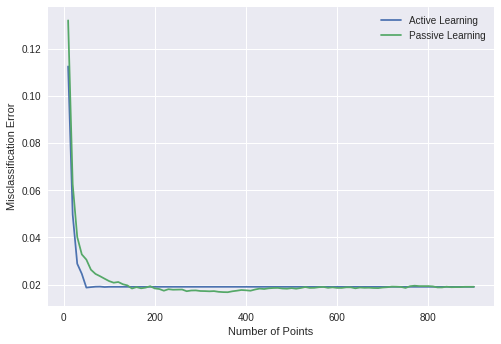

In [55]:

import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
ax.plot(d2[0],d2[1],label='Active Learning')
ax.plot(d1[0],d1[1],label='Passive Learning')
plt.xlabel('Number of Points')
plt.ylabel('Misclassification Error')
plt.legend()
plt.show()

Conclusions:
Initially, Active Learning has error rate less than Passive Learning due to selection of closest points to the hyperplane. As the number points increases both the error rate approach the same value. Finally, at the end they converge.
Active learning algorithms are built upon Support vector machines (SVMs) and exploit the structure of the SVM to determine which data points to label. Such methods usually calculate the margin,  **W**, of each unlabeled datum in  **T_{{U,i}}** and treat  **W** as an  **n**-dimensional distance from that datum to the separating hyperplane.

Active Learning is a special case of semi-supervised machine learning in which a learning algorithm is able to interactively query the user (or some other information source) to obtain the desired outputs at new data point.
In passive Learning no intuitive understanding is present.This was observed because random points were taken without considering the distance of points from hyperplane or having a relation with the SVM constructed with previous points in dataset.


Whereas, in active Learning after construction of the SVM at each iteration, the SVM is queried to find the closest points to the hyperplane and added to the SVM training set. This is the desired output for new data point referenced earlier.